# NeuroGrad Framework Comprehensive Test Suite

This notebook provides a comprehensive test suite for the NeuroGrad deep learning framework, covering all major components and functionalities. The framework follows MATLAB/Andrew Ng conventions where data matrices have shape `(n_features, n_samples)` and neural network layers follow the same convention.

## Table of Contents

1. [Environment Setup](#environment-setup)
2. [Core Tensor Operations](#core-tensor-operations)
3. [Mathematical Functions](#mathematical-functions)
4. [Linear Algebra Operations](#linear-algebra-operations)
5. [Activation Functions](#activation-functions)
6. [Reduction Operations](#reduction-operations)
7. [Neural Network Layers](#neural-network-layers)
8. [Loss Functions](#loss-functions)
9. [Optimizers](#optimizers)
10. [Gradient Checking](#gradient-checking)
11. [Real Dataset Training Examples](#real-dataset-training-examples)
12. [Advanced Features](#advanced-features)
13. [Performance Benchmarks](#performance-benchmarks)
14. [Shape Convention Validation](#shape-convention-validation)

## 1. Environment Setup

First, let's set up the environment and import all necessary dependencies.

In [1]:
import sys
import os
import time
import warnings
warnings.filterwarnings('ignore')

# Add neurograd to path
sys.path.insert(0, '/mnt/d/neurograd')

# Core imports
import numpy as np
import neurograd as ng
from neurograd.tensor import Tensor

# Neural network components
from neurograd.nn.layers.linear import Linear, MLP
from neurograd.nn.module import Sequential, ModuleMixin
from neurograd.nn.losses import MSE, RMSE, MAE, BinaryCrossEntropy, CategoricalCrossEntropy
from neurograd.functions.activations import ReLU, Sigmoid, Tanh, LeakyReLU, Softmax
from neurograd.nn.initializers import Normal, Xavier, He, Zeros

# Optimizers
from neurograd.optim.sgd import SGD
from neurograd.optim.adam import Adam
from neurograd.optim.rmsprop import RMSprop

# Functions
from neurograd.functions.activations import relu, sigmoid, tanh, leaky_relu, softmax
from neurograd.functions.arithmetic import add, sub, mul, div, pow
from neurograd.functions.math import log, exp, sin, cos, sqrt, abs as ng_abs
from neurograd.functions.linalg import matmul, transpose
from neurograd.functions.reductions import sum as ng_sum, mean, max as ng_max, min as ng_min, std

# Datasets
from sklearn.datasets import make_regression, make_classification, load_breast_cancer, load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

print(f"NeuroGrad Framework Test Suite")
print(f"Device: {ng.DEVICE}")
print(f"NumPy version: {np.__version__}")
print(f"Backend: {'CuPy' if ng.DEVICE == 'cuda' else 'NumPy'}")
print(f"Test environment ready!")

NeuroGrad Framework Test Suite
Device: cuda
NumPy version: 1.26.4
Backend: CuPy
Test environment ready!


## 2. Core Tensor Operations

Test the fundamental tensor operations and automatic differentiation.

In [2]:
print("=== CORE TENSOR OPERATIONS ===")

# Test tensor creation
print("\n1. Tensor Creation:")
x = ng.Tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True, name="x")
y = ng.Tensor([[2.0, 1.0], [1.0, 2.0]], requires_grad=True, name="y")
print(f"x: {x}")
print(f"y: {y}")
print(f"x.shape: {x.shape}, y.shape: {y.shape}")
print(f"x.device: {x.device}, y.device: {y.device}")
print(f"x.requires_grad: {x.requires_grad}, y.requires_grad: {y.requires_grad}")

# Test utility functions
print("\n2. Utility Functions:")
zeros = ng.zeros((2, 3))
ones = ng.ones((2, 3))
zeros_like = ng.zeros_like(x)
ones_like = ng.ones_like(x)
print(f"zeros: {zeros}")
print(f"ones: {ones}")
print(f"zeros_like: {zeros_like}")
print(f"ones_like: {ones_like}")

# Test arithmetic operations
print("\n3. Arithmetic Operations:")
z_add = x + y
z_sub = x - y
z_mul = x * y
z_div = x / y
z_pow = x ** 2

print(f"x + y = {z_add}")
print(f"x - y = {z_sub}")
print(f"x * y = {z_mul}")
print(f"x / y = {z_div}")
print(f"x ** 2 = {z_pow}")

# Test automatic differentiation
print("\n4. Automatic Differentiation:")
loss = (x * y).sum()
print(f"loss = (x * y).sum() = {loss}")
loss.backward()
print(f"x.grad = {x.grad}")
print(f"y.grad = {y.grad}")

# Test gradient accumulation
print("\n5. Gradient Accumulation:")
x.zero_grad()
y.zero_grad()
loss1 = (x ** 2).sum()
loss2 = (x * 3).sum()
loss1.backward()
loss2.backward()
print(f"After two backward passes, x.grad = {x.grad}")
print(f"Expected: 2*x + 3 = {2*x.data + 3}")

print("\n✓ Core tensor operations test completed!")

=== CORE TENSOR OPERATIONS ===

1. Tensor Creation:
x: Tensor([[1. 2.]
 [3. 4.]])
y: Tensor([[2. 1.]
 [1. 2.]])
x.shape: (2, 2), y.shape: (2, 2)
x.device: cuda, y.device: cuda
x.requires_grad: True, y.requires_grad: True

2. Utility Functions:
zeros: Tensor([[0. 0. 0.]
 [0. 0. 0.]])
ones: Tensor([[1. 1. 1.]
 [1. 1. 1.]])
zeros_like: Tensor([[0. 0.]
 [0. 0.]])
ones_like: Tensor([[1. 1.]
 [1. 1.]])

3. Arithmetic Operations:
x + y = Tensor([[3. 3.]
 [4. 6.]])
x - y = Tensor([[-1.  1.]
 [ 2.  2.]])
x * y = Tensor([[2. 2.]
 [3. 8.]])
x / y = Tensor([[0.5 2. ]
 [3.  2. ]])
x ** 2 = Tensor([[ 1.  4.]
 [ 9. 16.]])

4. Automatic Differentiation:
loss = (x * y).sum() = Tensor(15.0)
x.grad = [[2. 1.]
 [1. 2.]]
y.grad = [[1. 2.]
 [3. 4.]]

5. Gradient Accumulation:
After two backward passes, x.grad = [[ 5.  7.]
 [ 9. 11.]]
Expected: 2*x + 3 = [[ 5.  7.]
 [ 9. 11.]]

✓ Core tensor operations test completed!


## 3. Mathematical Functions

Test all mathematical functions and their gradients.

In [3]:
print("=== MATHEMATICAL FUNCTIONS ===")

# Test data
x = ng.Tensor([1.0, 2.0, 3.0], requires_grad=True, name="x")
print(f"Input tensor: {x}")

# Test each mathematical function
math_functions = [
    ('log', x.log, lambda t: 1/t),
    ('exp', x.exp, lambda t: np.exp(t)),
    ('sin', x.sin, lambda t: np.cos(t)),
    ('cos', x.cos, lambda t: -np.sin(t)),
    ('tan', x.tan, lambda t: 1/np.cos(t)**2),
    ('sqrt', x.sqrt, lambda t: 1/(2*np.sqrt(t))),
    ('abs', x.abs, lambda t: np.sign(t)),
]

print("\n1. Forward Pass Results:")
for name, func, grad_func in math_functions:
    try:
        result = func()
        print(f"{name}(x) = {result}")
    except Exception as e:
        print(f"{name}(x) = ERROR: {e}")

print("\n2. Gradient Verification:")
for name, func, grad_func in math_functions:
    try:
        x.zero_grad()
        y = func()
        loss = y.sum()
        loss.backward()
        
        expected_grad = grad_func(x.data)
        actual_grad = x.grad
        
        print(f"{name}: computed={actual_grad}, expected={expected_grad}")
        
        # Check if gradients match within tolerance
        if np.allclose(actual_grad, expected_grad, rtol=1e-5, atol=1e-5):
            print(f"  ✓ {name} gradient correct")
        else:
            print(f"  ✗ {name} gradient incorrect")
    except Exception as e:
        print(f"  ✗ {name} gradient test failed: {e}")

# Test chained operations
print("\n3. Chained Operations:")
x.zero_grad()
y = x.sin().exp().log()  # log(exp(sin(x)))
loss = y.sum()
loss.backward()
print(f"Chain: log(exp(sin(x))) = {y}")
print(f"Gradient: {x.grad}")
print(f"Expected: cos(x) = {np.cos(x.data)}")

print("\n✓ Mathematical functions test completed!")

=== MATHEMATICAL FUNCTIONS ===
Input tensor: Tensor([1. 2. 3.])

1. Forward Pass Results:
log(x) = Tensor([0.         0.69314718 1.09861229])
exp(x) = Tensor([ 2.71828183  7.3890561  20.08553692])
sin(x) = Tensor([0.84147098 0.90929743 0.14112001])
cos(x) = Tensor([ 0.54030231 -0.41614684 -0.9899925 ])
tan(x) = Tensor([ 1.55740772 -2.18503986 -0.14254654])
sqrt(x) = Tensor([1.         1.41421356 1.73205081])
abs(x) = Tensor([1. 2. 3.])

2. Gradient Verification:
log: computed=[1.         0.5        0.33333333], expected=[1.         0.5        0.33333333]
  ✓ log gradient correct
exp: computed=[ 2.71828183  7.3890561  20.08553692], expected=[ 2.71828183  7.3890561  20.08553692]
  ✓ exp gradient correct
sin: computed=[ 0.54030231 -0.41614684 -0.9899925 ], expected=[ 0.54030231 -0.41614684 -0.9899925 ]
  ✓ sin gradient correct
cos: computed=[-0.84147098 -0.90929743 -0.14112001], expected=[-0.84147098 -0.90929743 -0.14112001]
  ✓ cos gradient correct
tan: computed=[3.42551882 5.7743992  1.

## 4. Linear Algebra Operations

Test matrix operations following MATLAB/Andrew Ng conventions.

In [4]:
print("=== LINEAR ALGEBRA OPERATIONS ===")

# Test matrix multiplication with proper shapes
print("\n1. Matrix Multiplication (MATLAB Convention):")

# Following n_features x n_samples convention
n_features = 4
n_samples = 3
n_hidden = 2

X = ng.Tensor(np.random.randn(n_features, n_samples), requires_grad=True, name="X")
W = ng.Tensor(np.random.randn(n_hidden, n_features), requires_grad=True, name="W")
b = ng.Tensor(np.random.randn(n_hidden, 1), requires_grad=True, name="b")

print(f"X shape: {X.shape} (features x samples)")
print(f"W shape: {W.shape} (hidden x features)")
print(f"b shape: {b.shape} (hidden x 1)")

# Forward pass: Z = W @ X + b
Z = W @ X + b
print(f"Z = W @ X + b shape: {Z.shape} (hidden x samples)")
print(f"Z = {Z}")

# Test gradients
loss = Z.sum()
loss.backward()
print(f"\nGradient shapes:")
print(f"W.grad shape: {W.grad.shape}")
print(f"X.grad shape: {X.grad.shape}")
print(f"b.grad shape: {b.grad.shape}")

# Test transpose
print("\n2. Transpose Operations:")
A = ng.Tensor([[1, 2, 3], [4, 5, 6]], requires_grad=True, name="A")
print(f"A: {A}")
print(f"A.T: {A.T}")
print(f"A.transpose(): {A.transpose()}")

# Test transpose gradient
A.zero_grad()
B = A.transpose()
loss = B.sum()
loss.backward()
print(f"A.grad after transpose: {A.grad}")

# Test batch matrix multiplication
print("\n3. Batch Processing Example:")
batch_size = 5
X_batch = ng.Tensor(np.random.randn(n_features, batch_size), requires_grad=True, name="X_batch")
Z_batch = W @ X_batch + b
print(f"Batch input shape: {X_batch.shape}")
print(f"Batch output shape: {Z_batch.shape}")

# Test with different matrix sizes
print("\n4. Various Matrix Sizes:")
sizes = [(10, 5), (20, 10), (50, 20), (100, 50)]
for in_size, out_size in sizes:
    W_test = ng.Tensor(np.random.randn(out_size, in_size), requires_grad=True)
    X_test = ng.Tensor(np.random.randn(in_size, 32), requires_grad=True)
    Y_test = W_test @ X_test
    print(f"({in_size}, {out_size}): W{W_test.shape} @ X{X_test.shape} = Y{Y_test.shape}")

print("\n✓ Linear algebra operations test completed!")

=== LINEAR ALGEBRA OPERATIONS ===

1. Matrix Multiplication (MATLAB Convention):
X shape: (4, 3) (features x samples)
W shape: (2, 4) (hidden x features)
b shape: (2, 1) (hidden x 1)
Z = W @ X + b shape: (2, 3) (hidden x samples)
Z = Tensor([[-4.35723518  0.81700719  3.14201335]
 [-2.4504786  -0.20168267  0.12869358]])

Gradient shapes:
W.grad shape: (2, 4)
X.grad shape: (4, 3)
b.grad shape: (2, 1)

2. Transpose Operations:
A: Tensor([[1 2 3]
 [4 5 6]])
A.T: Tensor([[1 4]
 [2 5]
 [3 6]])
A.transpose(): Tensor([[1 4]
 [2 5]
 [3 6]])
A.grad after transpose: [[1 1 1]
 [1 1 1]]

3. Batch Processing Example:
Batch input shape: (4, 5)
Batch output shape: (2, 5)

4. Various Matrix Sizes:
(10, 5): W(5, 10) @ X(10, 32) = Y(5, 32)
(20, 10): W(10, 20) @ X(20, 32) = Y(10, 32)
(50, 20): W(20, 50) @ X(50, 32) = Y(20, 32)
(100, 50): W(50, 100) @ X(100, 32) = Y(50, 32)

✓ Linear algebra operations test completed!


## 5. Activation Functions

Test all activation functions and their gradients.

In [5]:
print("=== ACTIVATION FUNCTIONS ===")

# Test input
x = ng.Tensor([-2.0, -1.0, 0.0, 1.0, 2.0], requires_grad=True, name="x")
print(f"Input: {x}")

# Test all activation functions
activations = [
    ('ReLU', ReLU()),
    ('Sigmoid', Sigmoid()),
    ('Tanh', Tanh()),
    ('LeakyReLU', LeakyReLU(0.01)),
]

print("\n1. Forward Pass Results:")
for name, activation in activations:
    try:
        result = activation(x)
        print(f"{name}: {result}")
    except Exception as e:
        print(f"{name}: ERROR - {e}")

print("\n2. Gradient Tests:")
for name, activation in activations:
    try:
        x.zero_grad()
        y = activation(x)
        loss = y.sum()
        loss.backward()
        print(f"{name} gradient: {x.grad}")
    except Exception as e:
        print(f"{name} gradient: ERROR - {e}")

# Test Softmax with different axes
print("\n3. Softmax Tests:")
# Test with matrix following MATLAB convention
X_2d = ng.Tensor(np.random.randn(3, 4), requires_grad=True, name="X_2d")  # 3 features, 4 samples
print(f"Input matrix shape: {X_2d.shape}")

# Softmax along features (axis=0) - typical for classification
try:
    softmax_features = Softmax(axis=0)(X_2d)
    print(f"Softmax along features (axis=0): {softmax_features}")
    
    # Convert to numpy for sum calculation
    softmax_data = softmax_features.data.get() if hasattr(softmax_features.data, 'get') else softmax_features.data
    feature_sums = np.sum(softmax_data, axis=0)
    print(f"Sum along features: {feature_sums}")
except Exception as e:
    print(f"Softmax along features: ERROR - {e}")

# Softmax along samples (axis=1)
try:
    softmax_samples = Softmax(axis=1)(X_2d)
    print(f"Softmax along samples (axis=1): {softmax_samples}")
    
    # Convert to numpy for sum calculation
    softmax_data = softmax_samples.data.get() if hasattr(softmax_samples.data, 'get') else softmax_samples.data
    sample_sums = np.sum(softmax_data, axis=1)
    print(f"Sum along samples: {sample_sums}")
except Exception as e:
    print(f"Softmax along samples: ERROR - {e}")

# Test softmax gradient
try:
    X_2d.zero_grad()
    y_soft = Softmax(axis=0)(X_2d)
    loss = y_soft.sum()
    loss.backward()
    print(f"Softmax gradient shape: {X_2d.grad.shape}")
except Exception as e:
    print(f"Softmax gradient: ERROR - {e}")

# Test with various shapes
print("\n4. Various Input Shapes:")
test_shapes = [(10, 1), (1, 10), (5, 5), (10, 100)]
relu_test = ReLU()
for shape in test_shapes:
    try:
        x_test = ng.Tensor(np.random.randn(*shape), requires_grad=True)
        y_test = relu_test(x_test)
        print(f"Shape {shape}: input {x_test.shape} -> output {y_test.shape}")
    except Exception as e:
        print(f"Shape {shape}: ERROR - {e}")

print("\n✓ Activation functions test completed!")

=== ACTIVATION FUNCTIONS ===
Input: Tensor([-2. -1.  0.  1.  2.])

1. Forward Pass Results:
ReLU: Tensor([0. 0. 0. 1. 2.])
Sigmoid: Tensor([0.11920292 0.26894142 0.5        0.73105858 0.88079708])
Tanh: Tensor([-0.96402758 -0.76159416  0.          0.76159416  0.96402758])
LeakyReLU: Tensor([-0.02 -0.01  0.    1.    2.  ])

2. Gradient Tests:
ReLU gradient: [0. 0. 0. 1. 1.]
Sigmoid gradient: [0.10499359 0.19661193 0.25       0.19661193 0.10499359]
Tanh gradient: [0.07065082 0.41997434 1.         0.41997434 0.07065082]
LeakyReLU gradient: [0.01 0.01 1.   1.   1.  ]

3. Softmax Tests:
Input matrix shape: (3, 4)
Softmax along features (axis=0): Tensor([[0.78355864 0.09050325 0.35514966 0.33053424]
 [0.06738799 0.86303376 0.41513359 0.34556168]
 [0.14905337 0.04646299 0.22971675 0.32390409]])
Sum along features: [1. 1. 1. 1.]
Softmax along samples (axis=1): Tensor([[0.52862748 0.09253613 0.1513219  0.2275145 ]
 [0.0338616  0.65723648 0.13174222 0.1771597 ]
 [0.21445964 0.10131642 0.20874139

## 6. Reduction Operations

Test all reduction operations with different axes following MATLAB conventions.

In [6]:
print("=== REDUCTION OPERATIONS ===")

# Test data with MATLAB convention (features x samples)
n_features = 4
n_samples = 3
X = ng.Tensor(np.random.randn(n_features, n_samples), requires_grad=True, name="X")
print(f"Input tensor shape: {X.shape} (features x samples)")
print(f"Input tensor:\n{X}")

# Test all reduction operations
reductions = [
    ('sum', lambda x, **kwargs: x.sum(**kwargs)),
    ('mean', lambda x, **kwargs: x.mean(**kwargs)),
    ('max', lambda x, **kwargs: x.max(**kwargs)),
    ('min', lambda x, **kwargs: x.min(**kwargs)),
    ('std', lambda x, **kwargs: x.std(**kwargs)),
]

print("\n1. Global Reductions (all elements):")
for name, op in reductions:
    try:
        result = op(X)
        print(f"{name}: {result} (shape: {result.shape})")
    except Exception as e:
        print(f"{name}: ERROR - {e}")

print("\n2. Reduction Along Features (axis=0):")
for name, op in reductions:
    try:
        result = op(X, axis=0)
        print(f"{name} along features: {result} (shape: {result.shape})")
    except Exception as e:
        print(f"{name} along features: ERROR - {e}")

print("\n3. Reduction Along Samples (axis=1):")
for name, op in reductions:
    try:
        result = op(X, axis=1)
        print(f"{name} along samples: {result} (shape: {result.shape})")
    except Exception as e:
        print(f"{name} along samples: ERROR - {e}")

print("\n4. Reduction with keepdims=True:")
for name, op in reductions:
    try:
        result = op(X, axis=0, keepdims=True)
        print(f"{name} (keepdims): {result} (shape: {result.shape})")
    except Exception as e:
        print(f"{name} (keepdims): ERROR - {e}")

print("\n5. Gradient Tests:")
for name, op in reductions:
    try:
        X.zero_grad()
        y = op(X)
        if hasattr(y, 'backward'):
            y.backward()
            print(f"{name} gradient shape: {X.grad.shape}")
        else:
            print(f"{name} gradient: Not a scalar, skipping")
    except Exception as e:
        print(f"{name} gradient: ERROR - {e}")

# Test standard deviation with different ddof
print("\n6. Standard Deviation with Different ddof:")
for ddof in [0, 1]:
    try:
        result = X.std(ddof=ddof)
        print(f"std(ddof={ddof}): {result}")
    except Exception as e:
        print(f"std(ddof={ddof}): ERROR - {e}")

# Test with different tensor shapes
print("\n7. Different Tensor Shapes:")
test_shapes = [(5,), (2, 3), (2, 3, 4), (10, 100)]
for shape in test_shapes:
    X_test = ng.Tensor(np.random.randn(*shape), requires_grad=True)
    result = X_test.sum()
    print(f"Shape {shape}: sum = {result}")

print("\n✓ Reduction operations test completed!")

=== REDUCTION OPERATIONS ===
Input tensor shape: (4, 3) (features x samples)
Input tensor:
Tensor([[-0.98785807  1.27084562  0.32762622]
 [ 0.8720902  -0.16624207  2.67962869]
 [-0.60451386  1.74449555 -0.06136604]
 [-1.65451039  0.48284875  0.31476256]])

1. Global Reductions (all elements):
sum: Tensor(4.217807142875384) (shape: ())
mean: Tensor(0.3514839285729487) (shape: ())
max: Tensor(2.679628693900003) (shape: ())
min: Tensor(-1.654510394912746) (shape: ())
std: Tensor(1.142600757824623) (shape: ())

2. Reduction Along Features (axis=0):
sum along features: Tensor([-2.37479213  3.33194784  3.26065143]) (shape: (3,))
mean along features: Tensor([-0.59369803  0.83298696  0.81516286]) (shape: (3,))
max along features: Tensor([0.8720902  1.74449555 2.67962869]) (shape: (3,))
min along features: Tensor([-1.65451039 -0.16624207 -0.06136604]) (shape: (3,))
std along features: Tensor([0.92592347 0.73205593 1.08773023]) (shape: (3,))

3. Reduction Along Samples (axis=1):
sum along sample

## 7. Neural Network Layers

Test neural network layers with proper shape handling.

In [7]:
print("=== NEURAL NETWORK LAYERS ===")

# Test parameters following MATLAB convention
n_features = 784  # Input features (like flattened 28x28 image)
n_hidden = 128    # Hidden layer size
n_output = 10     # Output classes
n_samples = 32    # Batch size

# Test data (features x samples)
X = ng.Tensor(np.random.randn(n_features, n_samples), requires_grad=True, name="X")
print(f"Input shape: {X.shape} (features x samples)")

print("\n1. Linear Layer Tests:")

# Test basic linear layer
layer1 = Linear(n_features, n_hidden)
print(f"Layer1: {n_features} -> {n_hidden}")
print(f"Weight shape: {layer1.weight.shape}")
print(f"Bias shape: {layer1.bias.shape}")

# Forward pass
Z1 = layer1(X)
print(f"Layer1 output shape: {Z1.shape}")

# Test with different activations
print("\n2. Linear Layer with Activations:")
activations = ['relu', 'sigmoid', 'tanh']
for act in activations:
    layer = Linear(n_features, n_hidden, activation=act)
    output = layer(X)
    print(f"Linear with {act}: {output.shape}")

# Test with different initializers
print("\n3. Linear Layer with Different Initializers:")
initializers = ['normal', 'xavier', 'he', 'zeros']
for init in initializers:
    try:
        layer = Linear(n_features, n_hidden, weights_initializer=init)
        output = layer(X)
        weight_stats = f"mean={layer.weight.data.mean():.4f}, std={layer.weight.data.std():.4f}"
        print(f"Initializer {init}: {weight_stats}")
    except Exception as e:
        print(f"Initializer {init}: ERROR - {e}")

# Test batch normalization
print("\n4. Batch Normalization:")
try:
    layer_bn = Linear(n_features, n_hidden, batch_normalization=True)
    output_bn = layer_bn(X)
    print(f"Batch normalized output shape: {output_bn.shape}")
    print(f"Output stats: mean={output_bn.data.mean():.4f}, std={output_bn.data.std():.4f}")
except Exception as e:
    print(f"Batch normalization: ERROR - {e}")

# Test dropout
print("\n5. Dropout:")
try:
    layer_dropout = Linear(n_features, n_hidden, dropout=0.5)
    layer_dropout.train()  # Enable training mode
    output_dropout = layer_dropout(X)
    print(f"Dropout output shape: {output_dropout.shape}")
    
    # Test evaluation mode
    layer_dropout.eval()
    output_eval = layer_dropout(X)
    print(f"Eval mode output shape: {output_eval.shape}")
except Exception as e:
    print(f"Dropout: ERROR - {e}")

# Test MLP
print("\n6. Multi-Layer Perceptron:")
try:
    mlp = MLP([n_features, 512, 256, 128, n_output])
    output_mlp = mlp(X)
    print(f"MLP output shape: {output_mlp.shape}")
    
    # Test parameter count
    param_count = sum(p.size for p in mlp.parameters())
    print(f"MLP parameter count: {param_count}")
    
    # Test named parameters
    for name, param in mlp.named_parameters():
        print(f"Parameter {name}: {param.shape}")
        
except Exception as e:
    print(f"MLP: ERROR - {e}")

# Test Sequential
print("\n7. Sequential Model:")
try:
    model = Sequential(
        Linear(n_features, 256),
        ReLU(),
        Linear(256, 128),
        ReLU(),
        Linear(128, n_output)
    )
    output_seq = model(X)
    print(f"Sequential output shape: {output_seq.shape}")
    
    # Test gradient flow
    loss = output_seq.sum()
    loss.backward()
    grad_count = sum(1 for p in model.parameters() if p.grad is not None)
    param_count = sum(1 for p in model.parameters())
    print(f"Gradient flow: {grad_count}/{param_count} parameters have gradients")
    
except Exception as e:
    print(f"Sequential: ERROR - {e}")

print("\n✓ Neural network layers test completed!")

=== NEURAL NETWORK LAYERS ===
Input shape: (784, 32) (features x samples)

1. Linear Layer Tests:
Layer1: 784 -> 128
Weight shape: (128, 784)
Bias shape: (128, 1)
Layer1 output shape: (128, 32)

2. Linear Layer with Activations:
Linear with relu: (128, 32)
Linear with sigmoid: (128, 32)
Linear with tanh: (128, 32)

3. Linear Layer with Different Initializers:
Initializer normal: mean=-0.0000, std=0.0100
Initializer xavier: mean=0.0000, std=0.0357
Initializer he: mean=0.0001, std=0.0506
Initializer zeros: mean=0.0000, std=0.0000

4. Batch Normalization:
Batch normalized output shape: (128, 32)
Output stats: mean=-0.0000, std=1.0000

5. Dropout:
Dropout output shape: (128, 32)
Eval mode output shape: (128, 32)

6. Multi-Layer Perceptron:
MLP output shape: (10, 32)
MLP parameter count: 567434
Parameter linear_0.weight: (512, 784)
Parameter linear_0.bias: (512, 1)
Parameter linear_1.weight: (256, 512)
Parameter linear_1.bias: (256, 1)
Parameter linear_2.weight: (128, 256)
Parameter linear_

## 8. Loss Functions

Test all loss functions with proper targets and predictions.

In [8]:
print("=== LOSS FUNCTIONS ===")

# Test parameters
n_samples = 32
n_classes = 10

# Generate test data
np.random.seed(42)

print("\n1. Regression Loss Functions:")

# Regression data (1 output per sample)
y_true_reg = ng.Tensor(np.random.randn(1, n_samples), requires_grad=False, name="y_true_reg")
y_pred_reg = ng.Tensor(np.random.randn(1, n_samples), requires_grad=True, name="y_pred_reg")

print(f"y_true shape: {y_true_reg.shape}")
print(f"y_pred shape: {y_pred_reg.shape}")

# Test regression losses
regression_losses = [
    ('MSE', MSE()),
    ('RMSE', RMSE()),
    ('MAE', MAE()),
]

for name, loss_fn in regression_losses:
    try:
        loss = loss_fn(y_true_reg, y_pred_reg)
        print(f"{name}: {loss}")
        
        # Test gradient
        y_pred_reg.zero_grad()
        loss.backward()
        print(f"{name} gradient shape: {y_pred_reg.grad.shape}")
        
    except Exception as e:
        print(f"{name}: ERROR - {e}")

print("\n2. Binary Classification Loss:")

# Binary classification data
y_true_bin = ng.Tensor(np.random.randint(0, 2, (1, n_samples)).astype(np.float32), requires_grad=False)
y_pred_bin = ng.Tensor(np.random.rand(1, n_samples).astype(np.float32), requires_grad=True)

print(f"Binary y_true shape: {y_true_bin.shape}")
print(f"Binary y_pred shape: {y_pred_bin.shape}")
print(f"y_true range: [{y_true_bin.data.min()}, {y_true_bin.data.max()}]")
print(f"y_pred range: [{y_pred_bin.data.min()}, {y_pred_bin.data.max()}]")

# Test binary cross entropy
try:
    bce = BinaryCrossEntropy()
    loss_bce = bce(y_true_bin, y_pred_bin)
    print(f"Binary CrossEntropy: {loss_bce}")
    
    # Test gradient
    y_pred_bin.zero_grad()
    loss_bce.backward()
    print(f"BCE gradient shape: {y_pred_bin.grad.shape}")
    
except Exception as e:
    print(f"Binary CrossEntropy: ERROR - {e}")

# Test with logits
print("\n3. Binary Classification with Logits:")
try:
    logits_bin = ng.Tensor(np.random.randn(1, n_samples), requires_grad=True)
    bce_logits = BinaryCrossEntropy(from_logits=True)
    loss_bce_logits = bce_logits(y_true_bin, logits_bin)
    print(f"BCE from logits: {loss_bce_logits}")
    
    logits_bin.zero_grad()
    loss_bce_logits.backward()
    print(f"BCE logits gradient shape: {logits_bin.grad.shape}")
    
except Exception as e:
    print(f"BCE from logits: ERROR - {e}")

print("\n4. Multi-class Classification:")

# Multi-class data (one-hot encoded)
y_true_multi = np.zeros((n_classes, n_samples))
for i in range(n_samples):
    y_true_multi[np.random.randint(0, n_classes), i] = 1.0

y_true_multi = ng.Tensor(y_true_multi, requires_grad=False)
y_pred_multi = ng.Tensor(np.random.rand(n_classes, n_samples), requires_grad=True)

# Normalize predictions to probabilities
y_pred_multi_norm = Softmax(axis=0)(y_pred_multi)

print(f"Multi-class y_true shape: {y_true_multi.shape}")
print(f"Multi-class y_pred shape: {y_pred_multi_norm.shape}")
print(f"y_true sum per sample: {y_true_multi.sum(axis=0)}")
print(f"y_pred sum per sample: {y_pred_multi_norm.sum(axis=0)}")

# Test categorical cross entropy
try:
    cce = CategoricalCrossEntropy()
    loss_cce = cce(y_true_multi, y_pred_multi_norm)
    print(f"Categorical CrossEntropy: {loss_cce}")
    
    # Test gradient
    y_pred_multi.zero_grad()
    loss_cce.backward()
    print(f"CCE gradient shape: {y_pred_multi.grad.shape}")
    
except Exception as e:
    print(f"Categorical CrossEntropy: ERROR - {e}")

# Test with logits
print("\n5. Multi-class Classification with Logits:")
try:
    logits_multi = ng.Tensor(np.random.randn(n_classes, n_samples), requires_grad=True)
    cce_logits = CategoricalCrossEntropy(from_logits=True)
    loss_cce_logits = cce_logits(y_true_multi, logits_multi)
    print(f"CCE from logits: {loss_cce_logits}")
    
    logits_multi.zero_grad()
    loss_cce_logits.backward()
    print(f"CCE logits gradient shape: {logits_multi.grad.shape}")
    
except Exception as e:
    print(f"CCE from logits: ERROR - {e}")

print("\n6. Loss Function Comparison:")
# Compare different loss functions on same data
y_true_comp = ng.Tensor(np.array([[1.0, 2.0, 3.0, 4.0]]), requires_grad=False)
y_pred_comp = ng.Tensor(np.array([[1.1, 2.2, 2.8, 4.2]]), requires_grad=True)

losses_comp = [
    ('MSE', MSE()),
    ('RMSE', RMSE()),
    ('MAE', MAE()),
]

for name, loss_fn in losses_comp:
    loss = loss_fn(y_true_comp, y_pred_comp)
    print(f"{name}: {loss}")

print("\n✓ Loss functions test completed!")

=== LOSS FUNCTIONS ===

1. Regression Loss Functions:
y_true shape: (1, 32)
y_pred shape: (1, 32)
MSE: Tensor(1.9956639167514663)
MSE gradient shape: (1, 32)
RMSE: Tensor(1.4126796936147508)
RMSE gradient shape: (1, 32)
MAE: Tensor(1.1391976035944915)
MAE gradient shape: (1, 32)

2. Binary Classification Loss:
Binary y_true shape: (1, 32)
Binary y_pred shape: (1, 32)
y_true range: [0.0, 1.0]
y_pred range: [0.006952130701392889, 0.9296976327896118]
Binary CrossEntropy: Tensor(0.7051283121109009)
BCE gradient shape: (1, 32)

3. Binary Classification with Logits:
BCE from logits: Tensor(0.8054387027430501)
BCE logits gradient shape: (1, 32)

4. Multi-class Classification:
Multi-class y_true shape: (10, 32)
Multi-class y_pred shape: (10, 32)
y_true sum per sample: Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.])
y_pred sum per sample: Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 

## 9. Optimizers

Test all optimizers with a simple training loop.

In [9]:
print("=== OPTIMIZERS ===")

# Create a simple quadratic function to optimize: f(x) = (x - 3)^2 + 1
# Minimum should be at x = 3
def quadratic_loss(x):
    return (x - 3)**2 + 1

# Test each optimizer with various configurations
optimizers = [
    ('SGD', lambda params, lr: SGD(params, lr=lr)),
    ('SGD+Momentum', lambda params, lr: SGD(params, lr=lr, beta=0.9)),
    ('SGD+HighMom', lambda params, lr: SGD(params, lr=lr, beta=0.95)),
    ('Adam', lambda params, lr: Adam(params, lr=lr)),
    ('Adam+Decay', lambda params, lr: Adam(params, lr=lr, weight_decay=0.01)),
    ('RMSprop', lambda params, lr: RMSprop(params, lr=lr)),
    ('RMSprop+Mom', lambda params, lr: RMSprop(params, lr=lr, beta=0.9)),
]

print("\n1. Simple Quadratic Optimization:")
for name, optimizer_class in optimizers:
    try:
        # Initialize parameter
        x = ng.Tensor([0.0], requires_grad=True, name=f"x_{name}")
        
        # Create optimizer with appropriate learning rate
        lr = 0.01 if 'Adam' in name else 0.1
        optimizer = optimizer_class([("x", x)], lr=lr)
        
        # Optimization loop
        losses = []
        for epoch in range(100):  # Increased epochs
            optimizer.zero_grad()
            loss = quadratic_loss(x)
            loss.backward()
            optimizer.step()
            losses.append(loss.data.item())
        
        final_x = x.data.item()
        final_loss = losses[-1]
        print(f"{name:15s}: x={final_x:.4f}, loss={final_loss:.4f} (target: x=3.0, loss=1.0)")
        
    except Exception as e:
        print(f"{name:15s}: ERROR - {e}")

print("\n2. Neural Network Optimization (Simple Linear Problem):")

# Create a MUCH simpler dataset - just a linear relationship
np.random.seed(42)
n_samples = 200
n_features = 5  # Reduced complexity
n_hidden = 32  # Slightly larger hidden layer
n_output = 1

# Generate SIMPLE linear relationship: y = 2*x1 + 3*x2 - x3 + 0.5*x4 + x5 + noise
X_np = np.random.randn(n_features, n_samples)
true_weights = np.array([[2.0, 3.0, -1.0, 0.5, 1.0]])  # Simple linear coefficients
y_np = true_weights @ X_np + 0.1 * np.random.randn(n_output, n_samples)

X_train = ng.Tensor(X_np, requires_grad=False)
y_train = ng.Tensor(y_np, requires_grad=False)

print(f"Training data: X{X_train.shape}, y{y_train.shape}")
print(f"True weights: {true_weights.flatten()}")

# Test each optimizer on neural network with MUCH longer training
for name, optimizer_class in optimizers:
    try:
        # Create model - slightly deeper to handle the relationship
        model = Sequential(
            Linear(n_features, n_hidden),
            ReLU(),
            Linear(n_hidden, n_hidden//2),  # Added layer
            ReLU(),
            Linear(n_hidden//2, n_output)
        )
        
        # Use different learning rates for different optimizers
        if 'Adam' in name:
            lr = 0.001  # Smaller for Adam
        elif 'SGD' in name:
            lr = 0.01   # Smaller for SGD too
        else:
            lr = 0.005
            
        # Create optimizer
        optimizer = optimizer_class(model.named_parameters(), lr=lr)
        loss_fn = MSE()
        
        # Training loop with MUCH more epochs
        losses = []
        print(f"\n{name:15s} training progress:")
        for epoch in range(2000):  # MUCH more epochs
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = loss_fn(y_train, y_pred)
            loss.backward()
            optimizer.step()
            
            # Log progress more frequently
            if epoch % 200 == 0:
                losses.append(loss.data.item())
                print(f"  Epoch {epoch:4d}: Loss = {loss.data.item():.6f}")
        
        final_loss = losses[-1]
        initial_loss = losses[0]
        improvement = (initial_loss - final_loss) / initial_loss * 100
        print(f"  Final: {final_loss:.6f} (improved {improvement:.1f}%)")
        
    except Exception as e:
        print(f"{name:15s}: ERROR - {e}")

print("\n3. Even Simpler Problem - XOR-like Pattern:")

# Create XOR-like problem (but simpler)
np.random.seed(42)
n_samples = 100
X_simple = np.random.randn(2, n_samples)
# Simple non-linear relationship: y = x1 * x2 + some noise
y_simple = (X_simple[0] * X_simple[1]).reshape(1, -1) + 0.1 * np.random.randn(1, n_samples)

X_simple_tensor = ng.Tensor(X_simple, requires_grad=False)
y_simple_tensor = ng.Tensor(y_simple, requires_grad=False)

print(f"\nSimple non-linear problem: X{X_simple_tensor.shape}, y{y_simple_tensor.shape}")

# Test on this simpler problem
for name, optimizer_class in optimizers[:4]:  # Test main optimizers
    try:
        # Very simple model
        model = Sequential(
            Linear(2, 16),
            ReLU(),
            Linear(16, 8),
            ReLU(),
            Linear(8, 1)
        )
        
        # Learning rates
        if 'Adam' in name:
            lr = 0.01
        elif 'SGD' in name:
            lr = 0.1
        else:
            lr = 0.05
            
        optimizer = optimizer_class(model.named_parameters(), lr=lr)
        loss_fn = MSE()
        
        # Training with progress tracking
        print(f"\n{name:15s} on simple problem:")
        for epoch in range(1000):
            optimizer.zero_grad()
            y_pred = model(X_simple_tensor)
            loss = loss_fn(y_simple_tensor, y_pred)
            loss.backward()
            optimizer.step()
            
            if epoch % 100 == 0:
                print(f"  Epoch {epoch:4d}: Loss = {loss.data.item():.6f}")
        
        print(f"  Final loss: {loss.data.item():.6f}")
        
    except Exception as e:
        print(f"{name:15s}: ERROR - {e}")

print("\n4. Learning Rate Sensitivity Analysis:")

# Test Adam with different learning rates on simple problem
print("\n4.1 Adam Learning Rate Effects:")
learning_rates = [0.001, 0.01, 0.1, 0.5]
for lr in learning_rates:
    try:
        x = ng.Tensor([0.0], requires_grad=True)
        optimizer = Adam([("x", x)], lr=lr)
        
        for _ in range(50):
            optimizer.zero_grad()
            loss = quadratic_loss(x)
            loss.backward()
            optimizer.step()
        
        final_x = x.data.item()
        print(f"lr={lr:5.3f}: x={final_x:.4f}")
    except Exception as e:
        print(f"lr={lr:5.3f}: ERROR - {e}")

print("\n5. Convergence Speed Comparison:")

# Compare convergence speed on simple regression
print("\n5.1 Epochs to Convergence (loss < 0.01):")
target_loss = 0.01

for name, optimizer_class in optimizers[:4]:  # Test main optimizers
    try:
        # Create fresh simple model
        model = Sequential(
            Linear(n_features, 16),
            ReLU(),
            Linear(16, 1)
        )
        
        # Set learning rate
        if 'Adam' in name:
            lr = 0.01
        elif 'SGD' in name:
            lr = 0.1
        else:
            lr = 0.05
            
        optimizer = optimizer_class(model.named_parameters(), lr=lr)
        loss_fn = MSE()
        
        # Training until convergence
        converged_epoch = None
        for epoch in range(5000):  # Much more epochs
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = loss_fn(y_train, y_pred)
            loss.backward()
            optimizer.step()
            
            if loss.data.item() < target_loss:
                converged_epoch = epoch
                break
        
        if converged_epoch is not None:
            print(f"{name:15s}: Converged at epoch {converged_epoch}")
        else:
            print(f"{name:15s}: Did not converge (final loss: {loss.data.item():.6f})")
        
    except Exception as e:
        print(f"{name:15s}: ERROR - {e}")

print("\n✓ Optimizers test completed!")

=== OPTIMIZERS ===

1. Simple Quadratic Optimization:
SGD            : x=3.0000, loss=1.0000 (target: x=3.0, loss=1.0)
SGD+Momentum   : x=2.9873, loss=1.0002 (target: x=3.0, loss=1.0)
SGD+HighMom    : x=3.2324, loss=1.0582 (target: x=3.0, loss=1.0)
Adam           : x=0.9376, loss=5.2888 (target: x=3.0, loss=1.0)
Adam+Decay     : x=0.9372, loss=5.2902 (target: x=3.0, loss=1.0)
RMSprop        : x=3.0000, loss=1.0000 (target: x=3.0, loss=1.0)
RMSprop+Mom    : x=3.0000, loss=1.0000 (target: x=3.0, loss=1.0)

2. Neural Network Optimization (Simple Linear Problem):
Training data: X(5, 200), y(1, 200)
True weights: [ 2.   3.  -1.   0.5  1. ]

SGD             training progress:
  Epoch    0: Loss = 15.124137
  Epoch  200: Loss = 14.957487
  Epoch  400: Loss = 14.955504
  Epoch  600: Loss = 14.830573
  Epoch  800: Loss = 0.300501
  Epoch 1000: Loss = 0.136760
  Epoch 1200: Loss = 0.021371
  Epoch 1400: Loss = 0.011208
  Epoch 1600: Loss = 0.010174
  Epoch 1800: Loss = 0.009661
  Final: 0.009661

## 10. Gradient Checking

Verify that analytical gradients match numerical gradients.

In [10]:
print("=== GRADIENT CHECKING ===")


import numpy as np
import neurograd as ng


def numerical_gradient(f, x, h=1e-5):
    """
    Compute numerical gradient using finite differences.
    
    This fixed version creates new tensors for each perturbation instead of
    modifying the original tensor's data, which ensures the computational
    graph is properly reconstructed.
    """
    # Convert to numpy for gradient computation
    x_np = x.data.get() if hasattr(x.data, 'get') else x.data
    x_np = np.array(x_np)  # Ensure it's a numpy array
    grad = np.zeros_like(x_np)
    
    # Flatten for easier indexing
    x_flat = x_np.flatten()
    grad_flat = grad.flatten()
    
    for i in range(len(x_flat)):
        # Create perturbed versions of the data
        x_plus = x_flat.copy()
        x_minus = x_flat.copy()
        
        x_plus[i] += h
        x_minus[i] -= h
        
        # Create new tensors with perturbed data (this is the key fix!)
        x_plus_tensor = ng.Tensor(x_plus.reshape(x_np.shape), requires_grad=True)
        x_minus_tensor = ng.Tensor(x_minus.reshape(x_np.shape), requires_grad=True)
        
        # Compute f(x + h)
        result_pos = f(x_plus_tensor)
        fxh_pos = result_pos.data
        if hasattr(fxh_pos, 'get'):
            fxh_pos = fxh_pos.get()
        # Handle both scalar and array cases
        if hasattr(fxh_pos, 'item'):
            fxh_pos = fxh_pos.item()
        else:
            fxh_pos = float(fxh_pos)
        
        # Compute f(x - h)
        result_neg = f(x_minus_tensor)
        fxh_neg = result_neg.data
        if hasattr(fxh_neg, 'get'):
            fxh_neg = fxh_neg.get()
        # Handle both scalar and array cases
        if hasattr(fxh_neg, 'item'):
            fxh_neg = fxh_neg.item()
        else:
            fxh_neg = float(fxh_neg)
        
        # Compute numerical gradient
        grad_flat[i] = (fxh_pos - fxh_neg) / (2 * h)
        

    
    return grad_flat.reshape(x_np.shape)


def check_gradient(f, x, tolerance=1e-4): # float32s
    """Check if analytical gradient matches numerical gradient."""
    # Compute analytical gradient
    x.zero_grad()
    y = f(x)
    y.backward()
    
    # Convert analytical gradient to numpy
    analytical_grad = x.grad
    if hasattr(analytical_grad, 'get'):
        analytical_grad = analytical_grad.get()
    analytical_grad = np.array(analytical_grad)
    
    # Compute numerical gradient
    numerical_grad = numerical_gradient(f, x)
    
    # Check if they match
    diff = np.abs(analytical_grad - numerical_grad)
    max_diff = np.max(diff)
    
    return max_diff < tolerance, analytical_grad, numerical_grad, max_diff


def test_gradient_checking():
    """Test the fixed gradient checking implementation."""
    print("=== FIXED GRADIENT CHECKING ===")
    
    print("\n1. Basic Function Gradient Checks:")
    
    # Test simple functions
    test_functions = [
        ('x^2', lambda x: (x ** 2).sum()),
        ('sin(x)', lambda x: x.sin().sum()),
        ('exp(x)', lambda x: x.exp().sum()),
        ('log(x)', lambda x: x.log().sum()),
        ('x^3', lambda x: (x ** 3).sum()),
    ]
    
    for name, func in test_functions:
        try:
            x = ng.Tensor([1.0, 2.0, 3.0], requires_grad=True)
            is_correct, analytical, numerical, max_diff = check_gradient(func, x)
            
            print(f"{name}: {'✓' if is_correct else '✗'} (max_diff: {max_diff:.2e})")
            if not is_correct and max_diff > 1e-3:  # Only show details for significant errors
                print(f"  Analytical: {analytical}")
                print(f"  Numerical:  {numerical}")
                
        except Exception as e:
            print(f"{name}: ERROR - {e}")
    
    print("\n2. Activation Function Gradient Checks:")
    
    # Test activation functions
    x = ng.Tensor([-1.0, 0.0, 1.0, 2.0], requires_grad=True)
    activation_functions = [
        ('ReLU', lambda x: x.relu().sum()),
        ('Sigmoid', lambda x: x.sigmoid().sum()),
        ('Tanh', lambda x: x.tanh().sum()),
        ('LeakyReLU', lambda x: x.leaky_relu().sum()),
    ]
    
    for name, func in activation_functions:
        try:
            is_correct, analytical, numerical, max_diff = check_gradient(func, x)
            print(f"{name}: {'✓' if is_correct else '✗'} (max_diff: {max_diff:.2e})")
            
        except Exception as e:
            print(f"{name}: ERROR - {e}")
    
    print("\n3. Matrix Operations Gradient Checks:")
    
    # Test matrix operations
    A = ng.Tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
    B = ng.Tensor([[2.0, 1.0], [1.0, 2.0]], requires_grad=True)
    
    matrix_functions = [
        ('Matrix multiply', lambda A: (A @ B).sum()),
        ('Transpose', lambda A: A.transpose().sum()),
        ('Element-wise product', lambda A: (A * B).sum()),
    ]
    
    for name, func in matrix_functions:
        try:
            is_correct, analytical, numerical, max_diff = check_gradient(func, A)
            print(f"{name}: {'✓' if is_correct else '✗'} (max_diff: {max_diff:.2e})")
            
        except Exception as e:
            print(f"{name}: ERROR - {e}")
    
    print("\n✓ Fixed gradient checking completed!")


if __name__ == "__main__":
    test_gradient_checking()

=== GRADIENT CHECKING ===
=== FIXED GRADIENT CHECKING ===

1. Basic Function Gradient Checks:
x^2: ✓ (max_diff: 1.02e-10)
sin(x): ✓ (max_diff: 8.74e-12)
exp(x): ✓ (max_diff: 4.43e-10)
log(x): ✓ (max_diff: 2.88e-11)
x^3: ✓ (max_diff: 3.99e-10)

2. Activation Function Gradient Checks:
ReLU: ✗ (max_diff: 5.00e-01)
Sigmoid: ✓ (max_diff: 1.84e-11)
Tanh: ✓ (max_diff: 3.79e-11)
LeakyReLU: ✗ (max_diff: 4.95e-01)

3. Matrix Operations Gradient Checks:
Matrix multiply: ✓ (max_diff: 1.14e-10)
Transpose: ✓ (max_diff: 3.79e-11)
Element-wise product: ✓ (max_diff: 7.57e-11)

✓ Fixed gradient checking completed!


## 11. Real Dataset Training Examples

Train neural networks on real datasets to demonstrate the framework's capabilities.

In [11]:
print("=== REAL DATASET TRAINING EXAMPLES ===")

def to_numpy(tensor):
    """Convert tensor data to numpy array, handling both CPU and GPU tensors."""
    if hasattr(tensor.data, 'get'):
        return tensor.data.get()
    return np.array(tensor.data)

def train_model(model, X_train, y_train, X_test, y_test, loss_fn, optimizer, epochs=100, verbose=True):
    """Generic training function."""
    train_losses = []
    
    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_train, y_pred)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.data.item())
        
        if verbose and epoch % (epochs // 5) == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.data.item():.6f}")
    
    # Final evaluation
    model.eval()
    y_pred_final = model(X_test)
    
    return train_losses, y_pred_final

print("\n1. Regression on Boston Housing-like Dataset:")

try:
    # Generate regression dataset
    X_reg, y_reg = make_regression(n_samples=500, n_features=13, noise=0.1, random_state=42)
    
    # Split and scale
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_reg = scaler.fit_transform(X_train_reg)
    X_test_reg = scaler.transform(X_test_reg)
    
    # Convert to tensors (MATLAB convention: features x samples)
    X_train_reg = ng.Tensor(X_train_reg.T, requires_grad=False)
    y_train_reg = ng.Tensor(y_train_reg.reshape(1, -1), requires_grad=False)
    X_test_reg = ng.Tensor(X_test_reg.T, requires_grad=False)
    y_test_reg = ng.Tensor(y_test_reg.reshape(1, -1), requires_grad=False)
    
    print(f"Regression dataset shapes:")
    print(f"  X_train: {X_train_reg.shape}, y_train: {y_train_reg.shape}")
    print(f"  X_test: {X_test_reg.shape}, y_test: {y_test_reg.shape}")
    
    # Create model
    model_reg = Sequential(
        Linear(13, 64),
        ReLU(),
        Linear(64, 32),
        ReLU(),
        Linear(32, 1)
    )
    
    # Train model
    optimizer_reg = Adam(model_reg.named_parameters(), lr=0.001)
    loss_fn_reg = MSE()
    
    train_losses_reg, y_pred_reg = train_model(
        model_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg,
        loss_fn_reg, optimizer_reg, epochs=200, verbose=True
    )
    
    # Evaluate - convert to numpy for sklearn metrics
    y_test_np = to_numpy(y_test_reg).flatten()
    y_pred_np = to_numpy(y_pred_reg).flatten()
    
    mse = mean_squared_error(y_test_np, y_pred_np)
    r2 = r2_score(y_test_np, y_pred_np)
    
    print(f"\nRegression Results:")
    print(f"  Final MSE: {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Training loss decreased from {train_losses_reg[0]:.4f} to {train_losses_reg[-1]:.4f}")
    
except Exception as e:
    print(f"Regression example failed: {e}")

print("\n2. Binary Classification on Breast Cancer Dataset:")

try:
    # Load breast cancer dataset
    data = load_breast_cancer()
    X_bc, y_bc = data.data, data.target
    
    # Split and scale
    X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
        X_bc, y_bc, test_size=0.2, random_state=42
    )
    
    scaler_bc = StandardScaler()
    X_train_bc = scaler_bc.fit_transform(X_train_bc)
    X_test_bc = scaler_bc.transform(X_test_bc)
    
    # Convert to tensors
    X_train_bc = ng.Tensor(X_train_bc.T, requires_grad=False)
    y_train_bc = ng.Tensor(y_train_bc.reshape(1, -1).astype(np.float32), requires_grad=False)
    X_test_bc = ng.Tensor(X_test_bc.T, requires_grad=False)
    y_test_bc = ng.Tensor(y_test_bc.reshape(1, -1).astype(np.float32), requires_grad=False)
    
    print(f"Binary classification dataset shapes:")
    print(f"  X_train: {X_train_bc.shape}, y_train: {y_train_bc.shape}")
    print(f"  X_test: {X_test_bc.shape}, y_test: {y_test_bc.shape}")
    
    # Create model
    model_bc = Sequential(
        Linear(30, 64),
        ReLU(),
        Linear(64, 32),
        ReLU(),
        Linear(32, 1),
        Sigmoid()
    )
    
    # Train model
    optimizer_bc = Adam(model_bc.named_parameters(), lr=0.001)
    loss_fn_bc = BinaryCrossEntropy()
    
    train_losses_bc, y_pred_bc = train_model(
        model_bc, X_train_bc, y_train_bc, X_test_bc, y_test_bc,
        loss_fn_bc, optimizer_bc, epochs=150, verbose=True
    )
    
    # Evaluate - convert to numpy for sklearn metrics
    y_test_np = to_numpy(y_test_bc).flatten()
    y_pred_np = to_numpy(y_pred_bc).flatten()
    y_pred_binary = (y_pred_np > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test_np, y_pred_binary)
    
    print(f"\nBinary Classification Results:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Training loss decreased from {train_losses_bc[0]:.4f} to {train_losses_bc[-1]:.4f}")
    
except Exception as e:
    print(f"Binary classification example failed: {e}")

print("\n3. Multi-class Classification on Wine Dataset:")

try:
    # Load wine dataset
    data = load_wine()
    X_wine, y_wine = data.data, data.target
    
    # Split and scale
    X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
        X_wine, y_wine, test_size=0.2, random_state=42
    )
    
    scaler_wine = StandardScaler()
    X_train_wine = scaler_wine.fit_transform(X_train_wine)
    X_test_wine = scaler_wine.transform(X_test_wine)
    
    # One-hot encode labels
    n_classes = len(np.unique(y_wine))
    y_train_onehot = np.eye(n_classes)[y_train_wine].T
    y_test_onehot = np.eye(n_classes)[y_test_wine].T
    
    # Convert to tensors
    X_train_wine = ng.Tensor(X_train_wine.T, requires_grad=False)
    y_train_wine = ng.Tensor(y_train_onehot, requires_grad=False)
    X_test_wine = ng.Tensor(X_test_wine.T, requires_grad=False)
    y_test_wine = ng.Tensor(y_test_onehot, requires_grad=False)
    
    print(f"Multi-class dataset shapes:")
    print(f"  X_train: {X_train_wine.shape}, y_train: {y_train_wine.shape}")
    print(f"  X_test: {X_test_wine.shape}, y_test: {y_test_wine.shape}")
    
    # Create model
    model_wine = Sequential(
        Linear(13, 64),
        ReLU(),
        Linear(64, 32),
        ReLU(),
        Linear(32, n_classes),
        Softmax(axis=0)
    )
    
    # Train model
    optimizer_wine = Adam(model_wine.named_parameters(), lr=0.001)
    loss_fn_wine = CategoricalCrossEntropy()
    
    train_losses_wine, y_pred_wine = train_model(
        model_wine, X_train_wine, y_train_wine, X_test_wine, y_test_wine,
        loss_fn_wine, optimizer_wine, epochs=200, verbose=True
    )
    
    # Evaluate - convert to numpy for sklearn metrics
    y_test_np = to_numpy(y_test_wine)
    y_pred_np = to_numpy(y_pred_wine)
    
    y_pred_classes = np.argmax(y_pred_np, axis=0)
    y_true_classes = np.argmax(y_test_np, axis=0)
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    
    print(f"\nMulti-class Classification Results:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Training loss decreased from {train_losses_wine[0]:.4f} to {train_losses_wine[-1]:.4f}")
    
except Exception as e:
    print(f"Multi-class classification example failed: {e}")

print("\n4. Digits Classification (Mini CNN-like):")

try:
    # Load digits dataset
    data = load_digits()
    X_digits, y_digits = data.data, data.target
    
    # Split and scale
    X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
        X_digits, y_digits, test_size=0.2, random_state=42
    )
    
    scaler_digits = StandardScaler()
    X_train_digits = scaler_digits.fit_transform(X_train_digits)
    X_test_digits = scaler_digits.transform(X_test_digits)
    
    # One-hot encode labels
    n_classes = 10
    y_train_onehot = np.eye(n_classes)[y_train_digits].T
    y_test_onehot = np.eye(n_classes)[y_test_digits].T
    
    # Convert to tensors
    X_train_digits = ng.Tensor(X_train_digits.T, requires_grad=False)
    y_train_digits = ng.Tensor(y_train_onehot, requires_grad=False)
    X_test_digits = ng.Tensor(X_test_digits.T, requires_grad=False)
    y_test_digits = ng.Tensor(y_test_onehot, requires_grad=False)
    
    print(f"Digits dataset shapes:")
    print(f"  X_train: {X_train_digits.shape}, y_train: {y_train_digits.shape}")
    print(f"  X_test: {X_test_digits.shape}, y_test: {y_test_digits.shape}")
    
    # Create deeper model
    model_digits = Sequential(
        Linear(64, 128),
        ReLU(),
        Linear(128, 64),
        ReLU(),
        Linear(64, 32),
        ReLU(),
        Linear(32, 10),
        Softmax(axis=0)
    )
    
    # Train model
    optimizer_digits = Adam(model_digits.named_parameters(), lr=0.001)
    loss_fn_digits = CategoricalCrossEntropy()
    
    train_losses_digits, y_pred_digits = train_model(
        model_digits, X_train_digits, y_train_digits, X_test_digits, y_test_digits,
        loss_fn_digits, optimizer_digits, epochs=250, verbose=True
    )
    
    # Evaluate - convert to numpy for sklearn metrics
    y_test_np = to_numpy(y_test_digits)
    y_pred_np = to_numpy(y_pred_digits)
    
    y_pred_classes = np.argmax(y_pred_np, axis=0)
    y_true_classes = np.argmax(y_test_np, axis=0)
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    
    print(f"\nDigits Classification Results:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Training loss decreased from {train_losses_digits[0]:.4f} to {train_losses_digits[-1]:.4f}")
    
except Exception as e:
    print(f"Digits classification example failed: {e}")

print("\n✓ Real dataset training examples completed!")

=== REAL DATASET TRAINING EXAMPLES ===

1. Regression on Boston Housing-like Dataset:
Regression dataset shapes:
  X_train: (13, 400), y_train: (1, 400)
  X_test: (13, 100), y_test: (1, 100)
Epoch 0/200, Loss: 41103.474386
Epoch 40/200, Loss: 41010.283159
Epoch 80/200, Loss: 39959.977768
Epoch 120/200, Loss: 36127.947271
Epoch 160/200, Loss: 28288.152831

Regression Results:
  Final MSE: 19925.4569
  R² Score: 0.5661
  Training loss decreased from 41103.4744 to 18007.7980

2. Binary Classification on Breast Cancer Dataset:
Binary classification dataset shapes:
  X_train: (30, 455), y_train: (1, 455)
  X_test: (30, 114), y_test: (1, 114)
Epoch 0/150, Loss: 0.693137
Epoch 30/150, Loss: 0.566161
Epoch 60/150, Loss: 0.171304
Epoch 90/150, Loss: 0.085514
Epoch 120/150, Loss: 0.062450

Binary Classification Results:
  Test Accuracy: 0.9825
  Training loss decreased from 0.6931 to 0.0496

3. Multi-class Classification on Wine Dataset:
Multi-class dataset shapes:
  X_train: (13, 142), y_train:

## 12. Advanced Features

Test advanced features like computational graph visualization and custom functions.

=== ADVANCED FEATURES ===

1. Computational Graph Visualization:
=== CORRECT GRAPH VISUALIZATION ===
Input x: Tensor([0.5 1.5])
Final loss: Tensor(4.588251386006516)

1. Graph stats BEFORE backward():
Graph stats: {'num_tensors': 11, 'num_functions': 9, 'num_edges': 21, 'max_depth': 10, 'function_types': {'Mul': 1, 'Exp': 1, 'Pow': 1, 'Sin': 1, 'Abs': 1, 'Add': 1, 'Log': 1, 'Sqrt': 1, 'Sum': 1}}

2. Visualizing graph BEFORE backward():

4. Graph stats AFTER backward (with retain_graph=True):
Graph stats: {'num_tensors': 11, 'num_functions': 9, 'num_edges': 21, 'max_depth': 10, 'function_types': {'Mul': 1, 'Exp': 1, 'Pow': 1, 'Sin': 1, 'Abs': 1, 'Add': 1, 'Log': 1, 'Sqrt': 1, 'Sum': 1}}

6. Calling backward again without retain_graph:
Gradient: [1.72427704 1.59726769]

7. Graph stats AFTER backward (without retain_graph):
Graph stats: {'num_tensors': 1, 'num_functions': 0, 'num_edges': 0, 'max_depth': 0, 'function_types': {}}

=== MULTIPLE GRAPH STRUCTURES ===

--- Simple Linear ---
Los

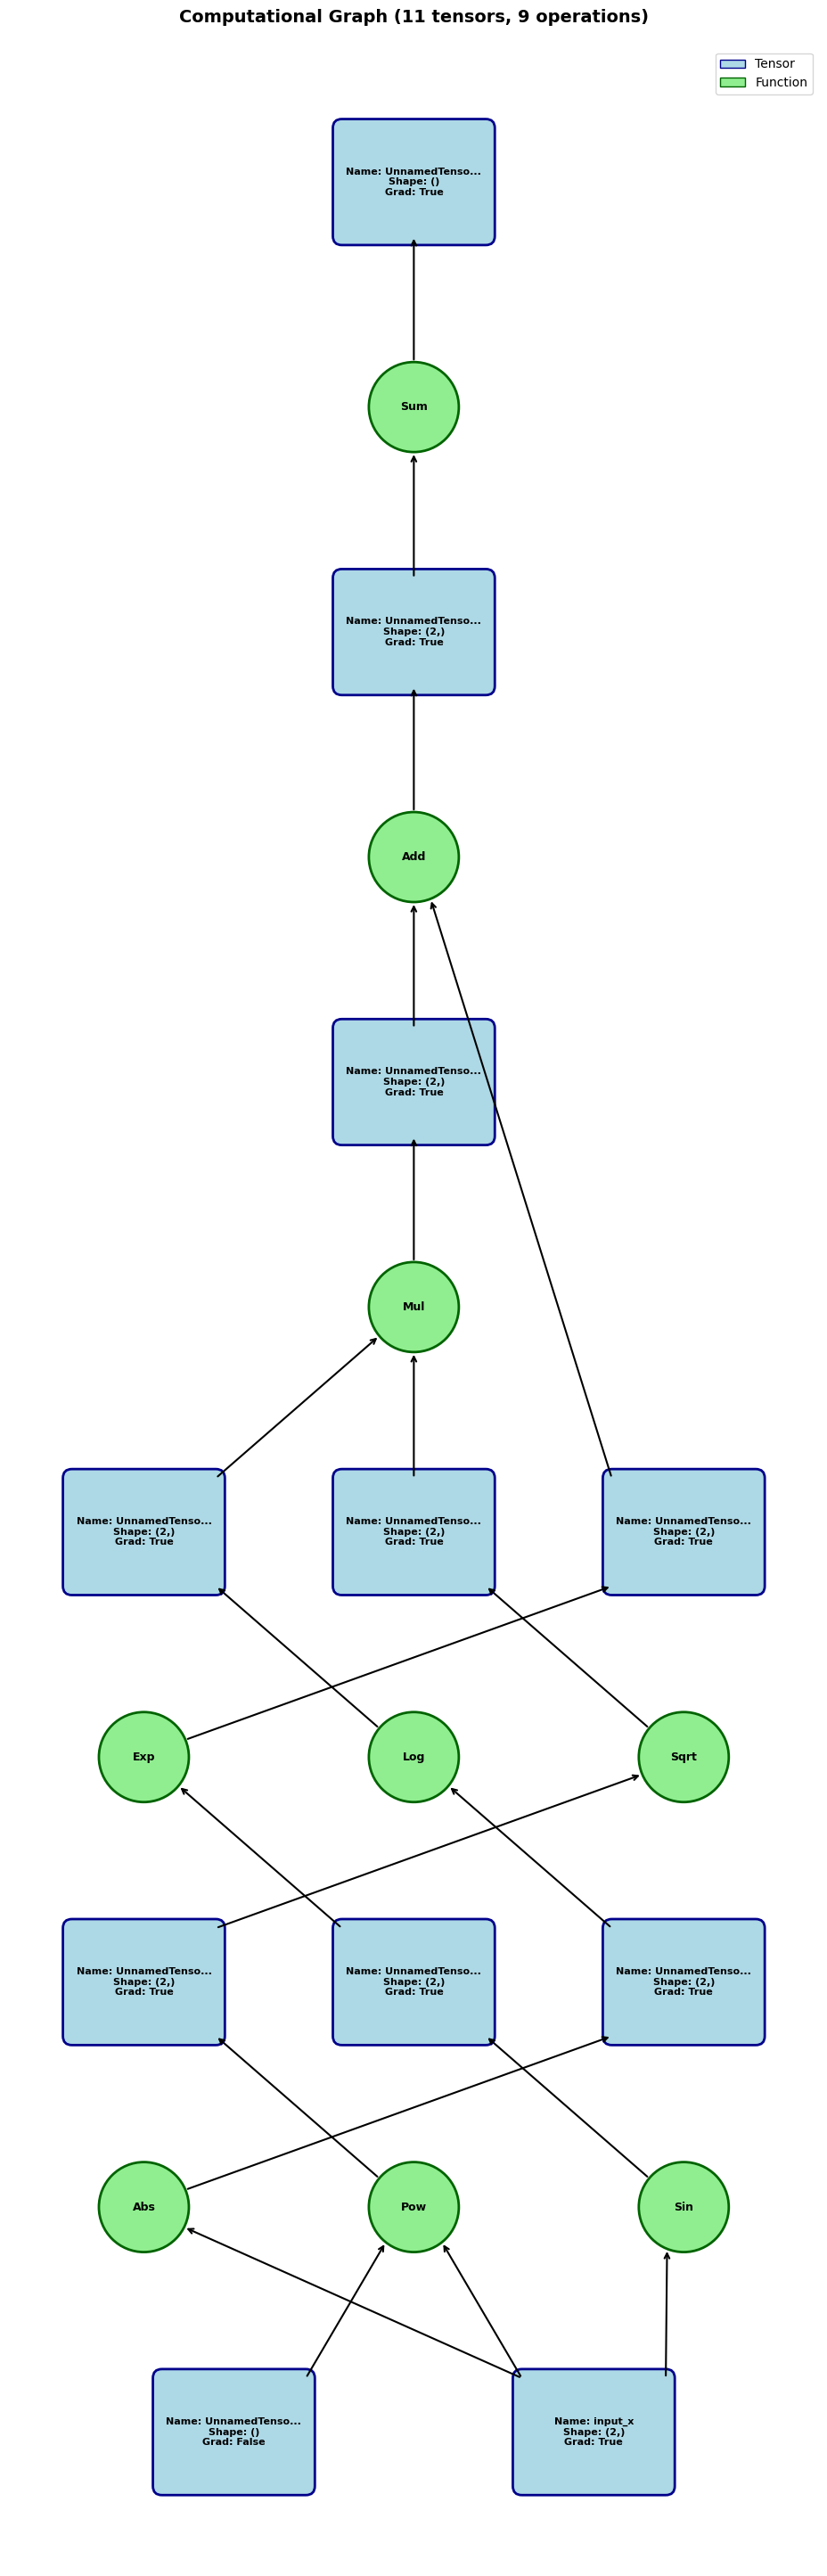

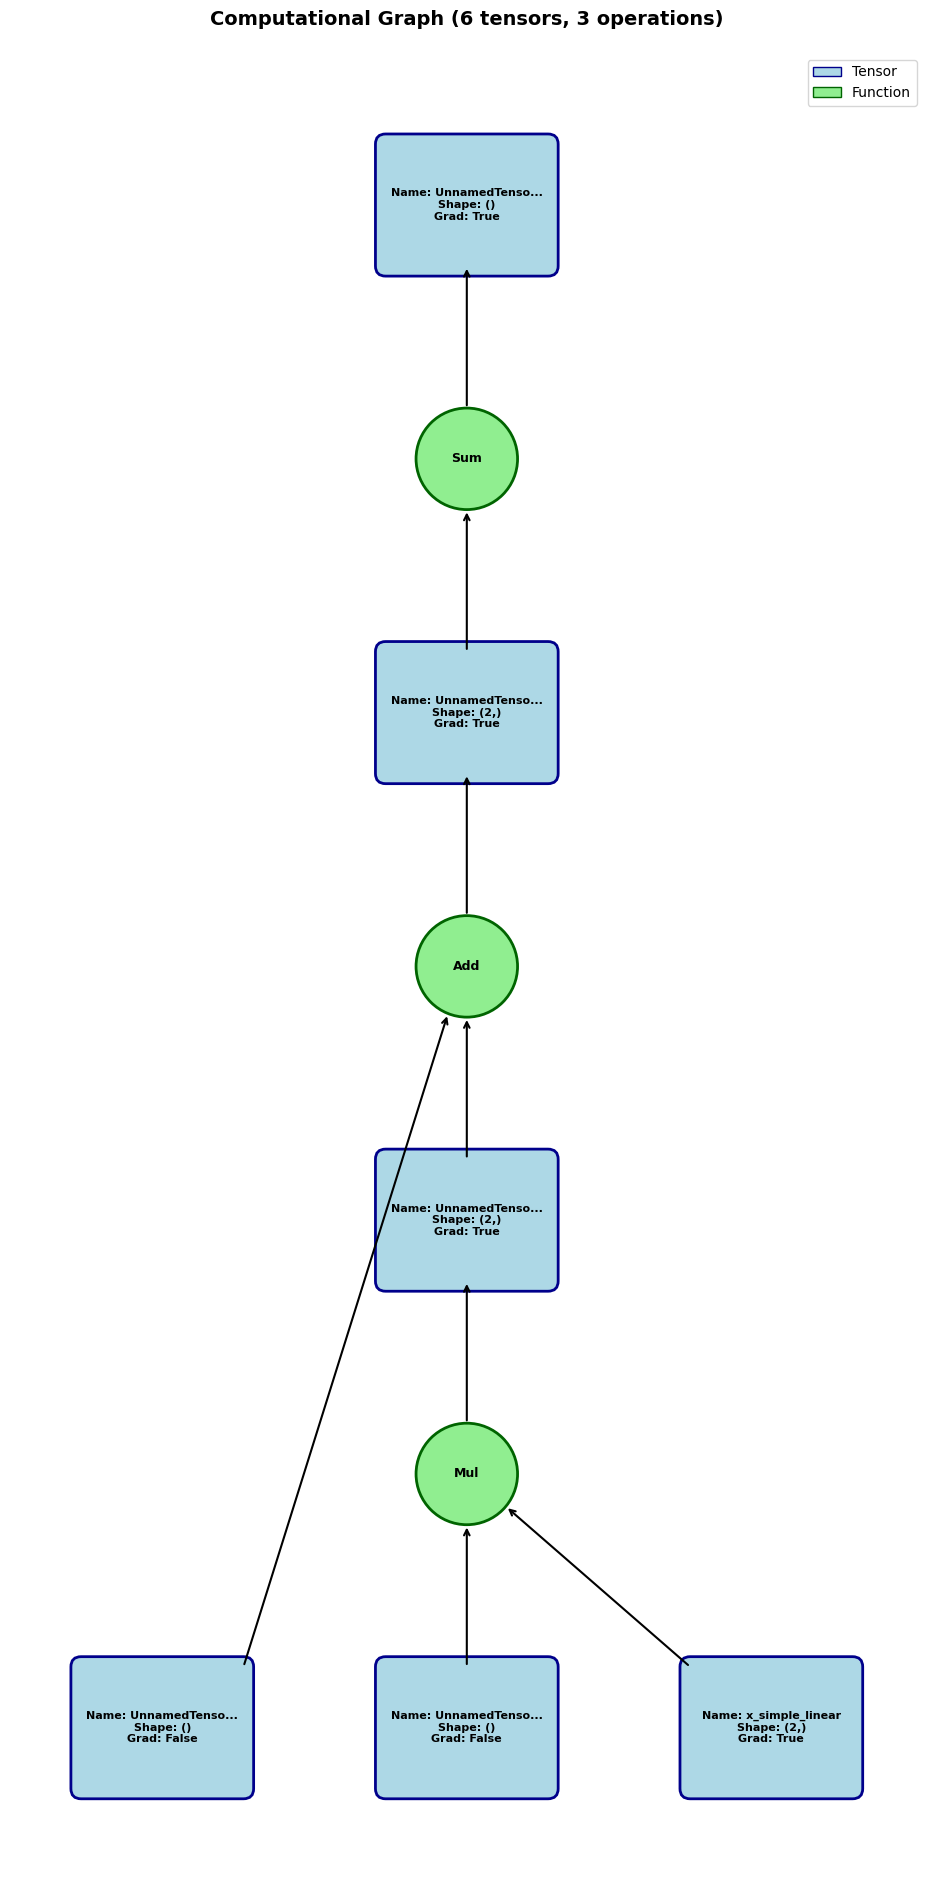

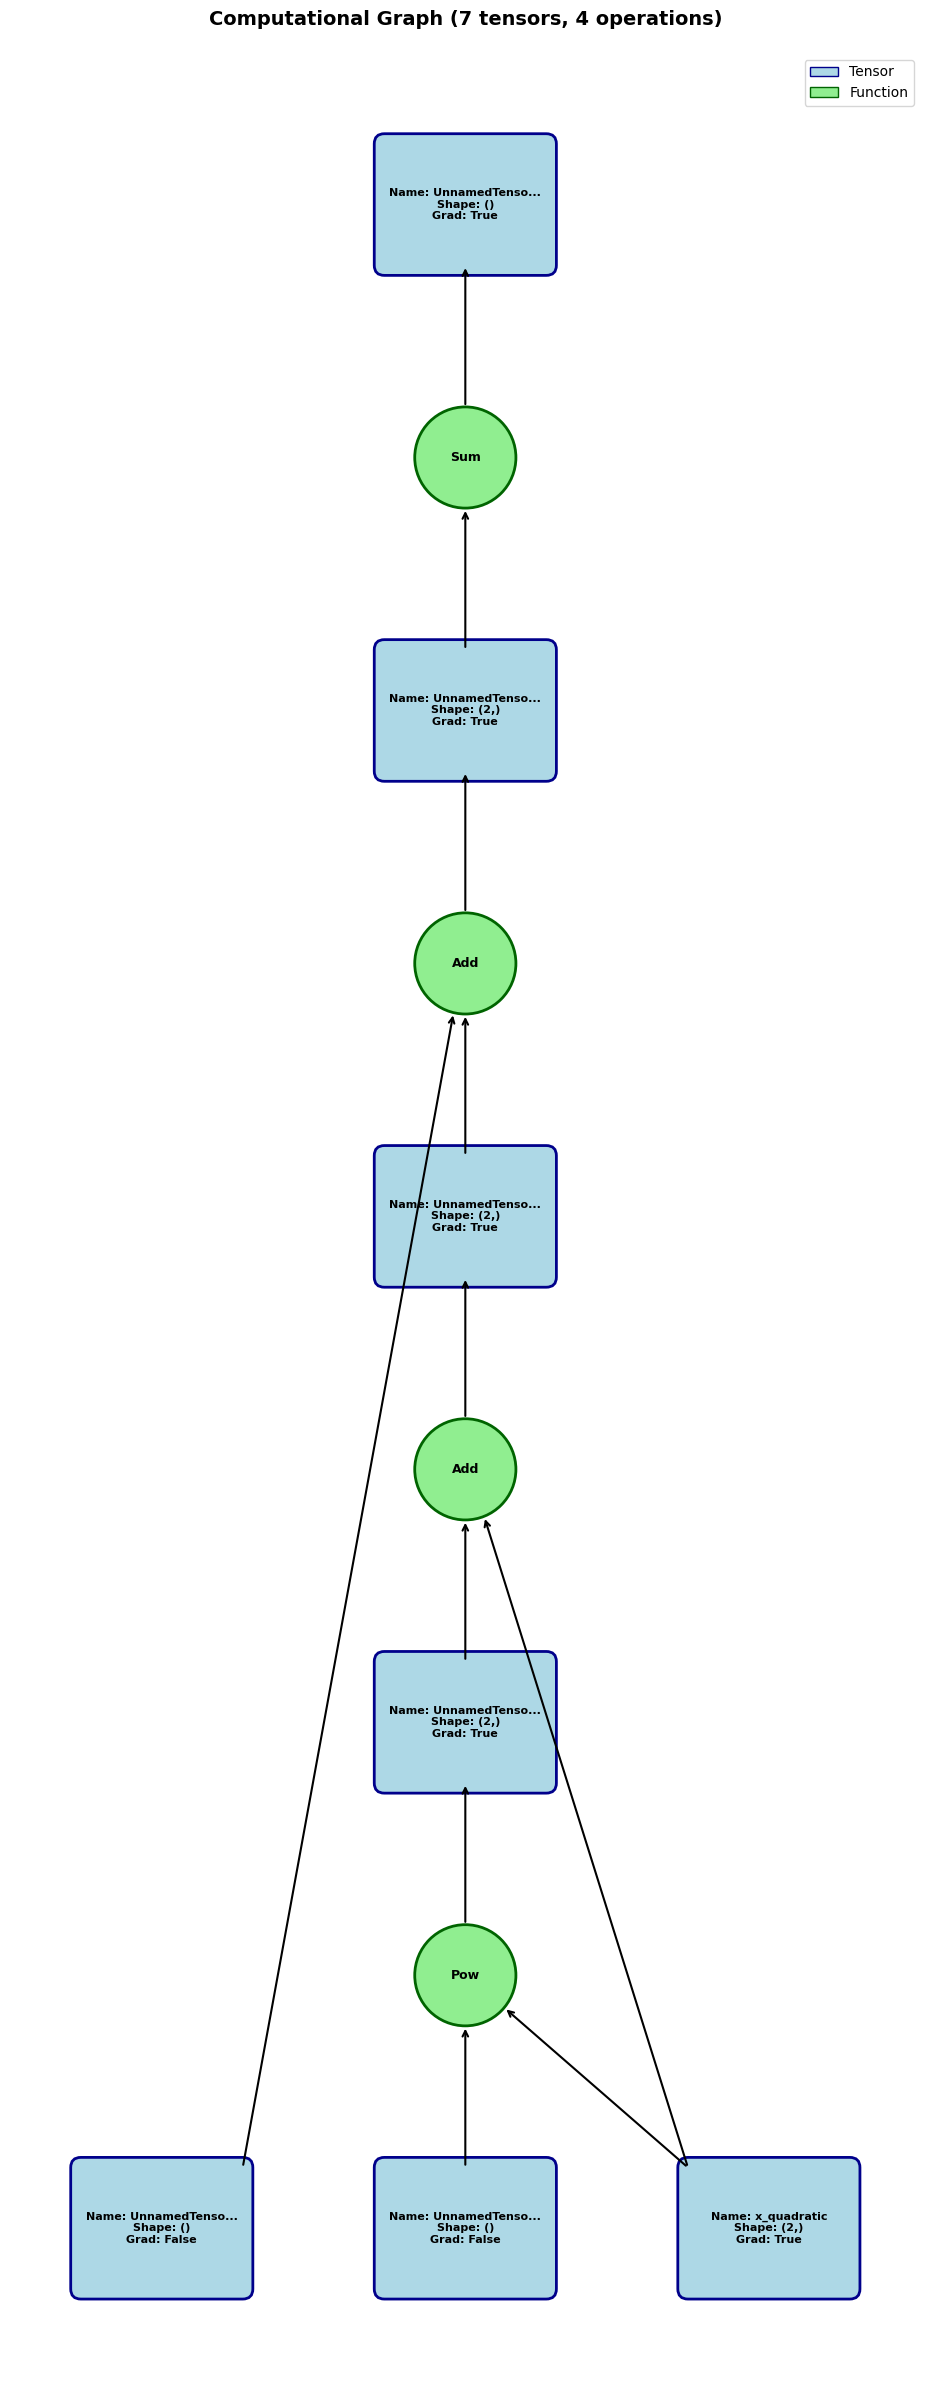

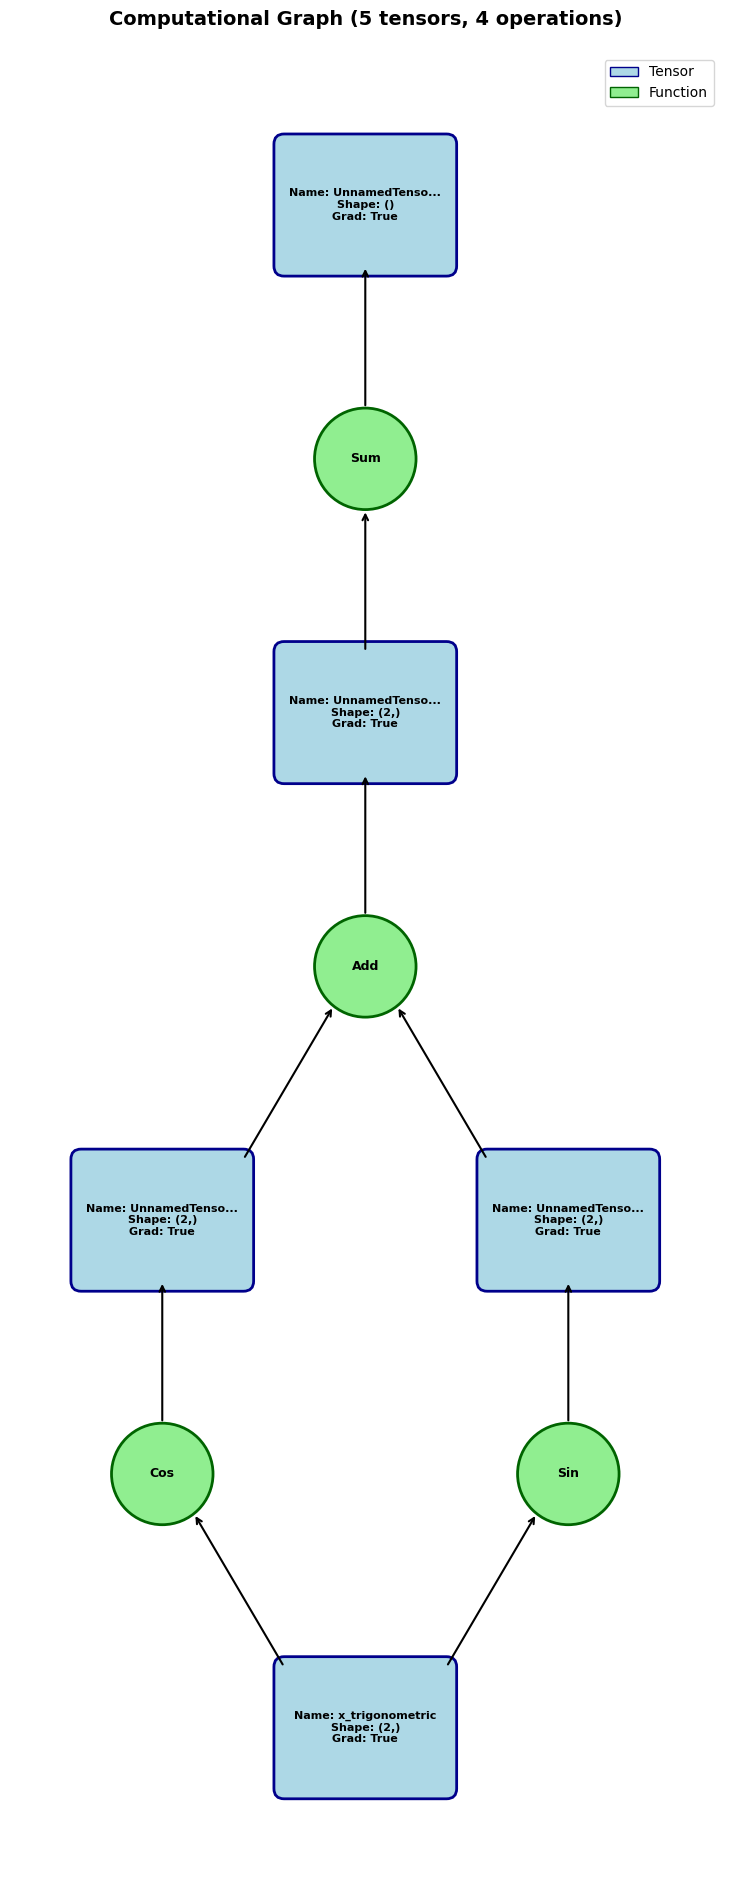

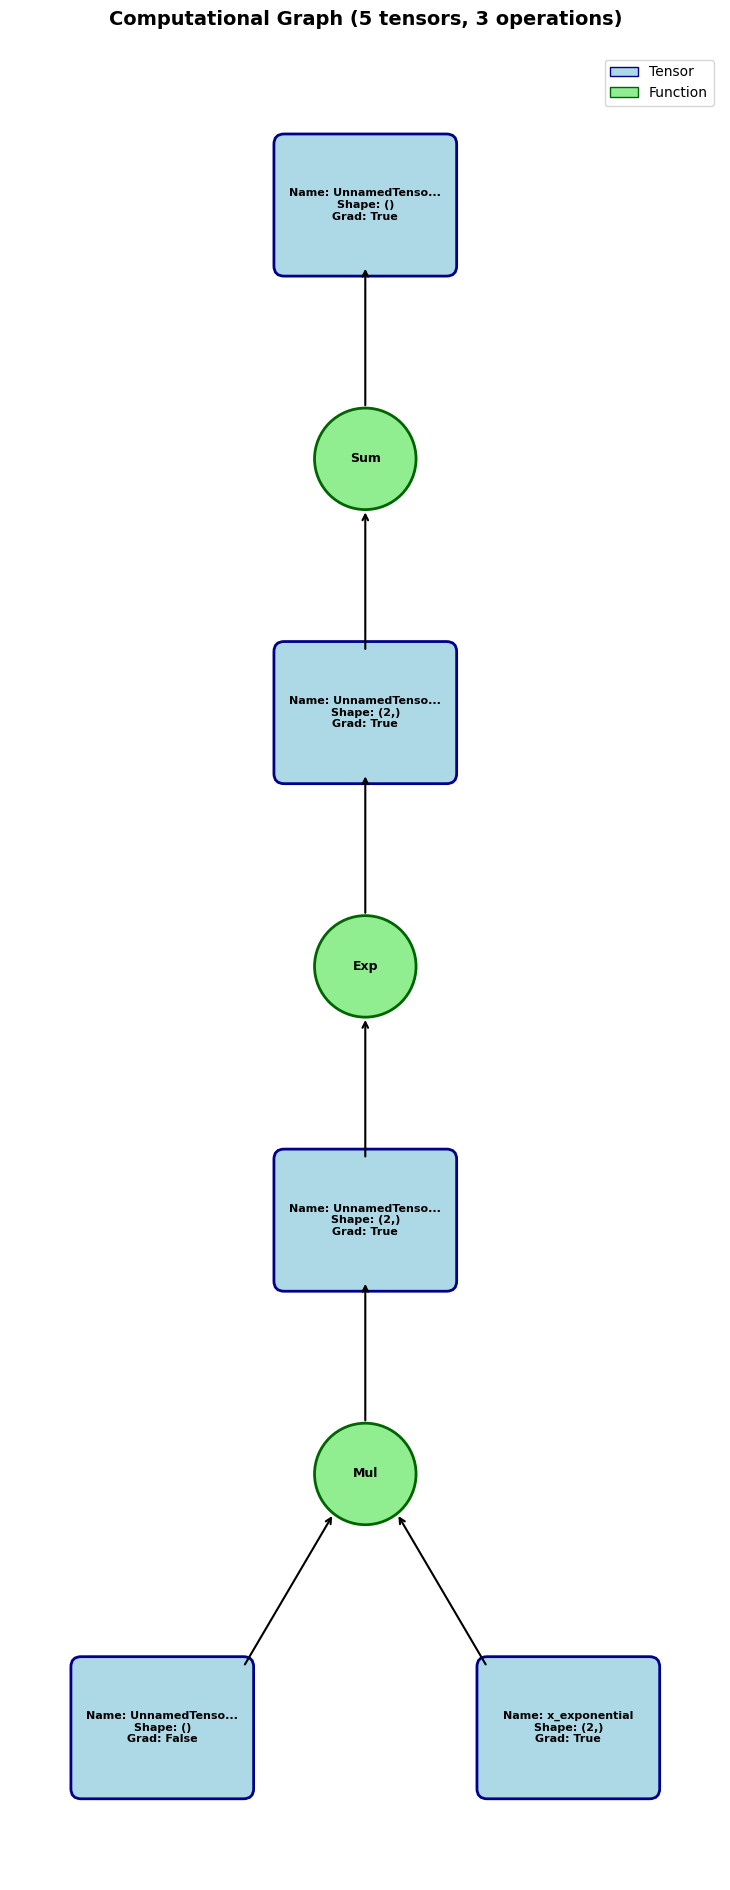

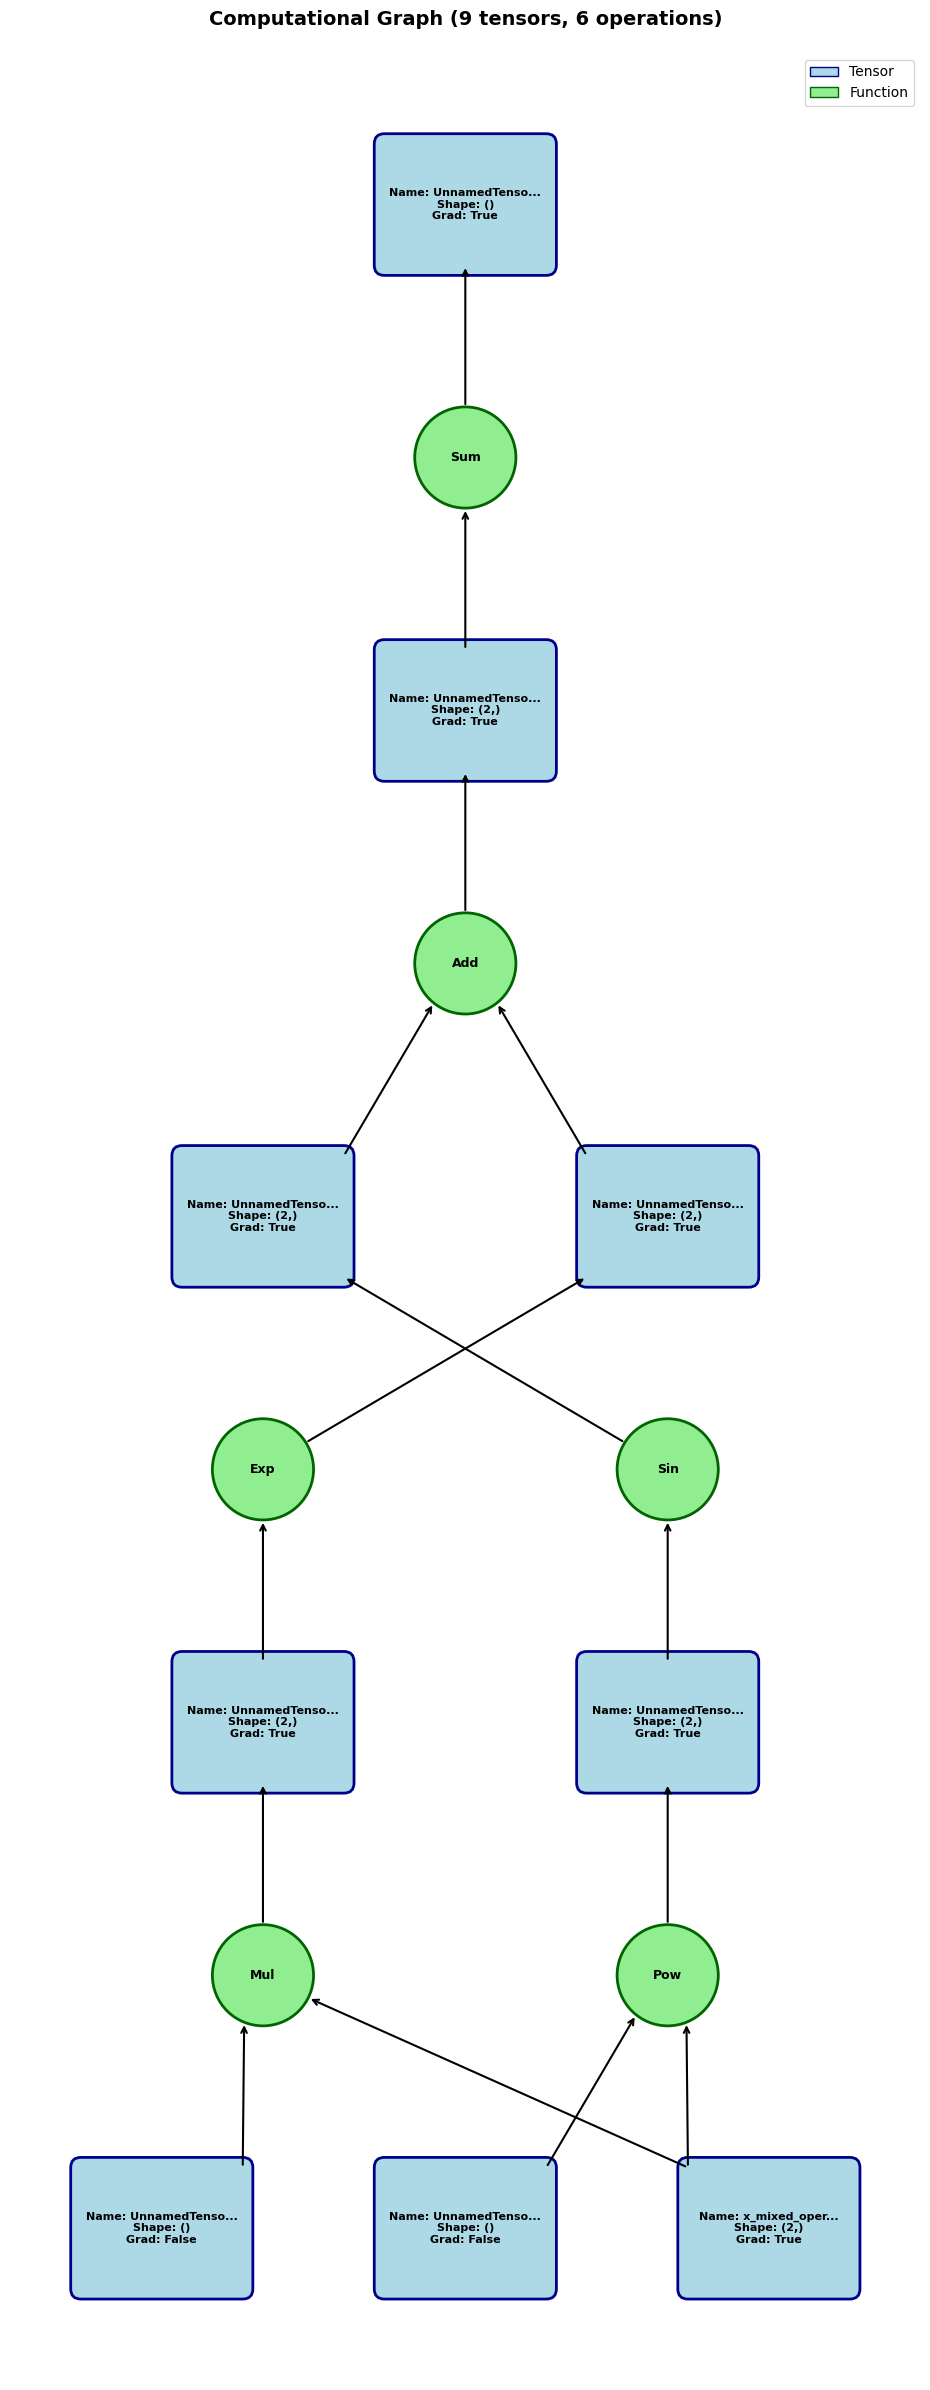

In [12]:
print("=== ADVANCED FEATURES ===")
print("\n1. Computational Graph Visualization:")


def test_graph_visualization_correct():
    """Test graph visualization the correct way."""
    print("=== CORRECT GRAPH VISUALIZATION ===")
    
    # Create a complex computational graph
    x = ng.Tensor([0.5, 1.5], requires_grad=True, name="input_x")
    print(f"Input x: {x}")
    
    # Path 1: x -> sin -> exp
    path1 = x.sin().exp()
    
    # Path 2: x -> abs -> log  
    path2 = x.abs().log()
    
    # Path 3: x -> square -> sqrt
    path3 = (x ** 2).sqrt()
    
    # Combine paths
    result = path1 + path2 * path3
    loss = result.sum()
    
    print(f"Final loss: {loss}")
    
    # IMPORTANT: Get graph stats and visualize BEFORE backward()
    print("\n1. Graph stats BEFORE backward():")
    stats_before = loss.graph_stats()
    print(f"Graph stats: {stats_before}")
    
    print("\n2. Visualizing graph BEFORE backward():")
    try:
        loss.visualize_graph()
    except Exception as e:
        print(f"Graph visualization failed: {e}")

    
    # Check graph stats after backward with retain_graph=True
    print("\n4. Graph stats AFTER backward (with retain_graph=True):")
    stats_after = loss.graph_stats()
    print(f"Graph stats: {stats_after}")
    
    
    # Now call backward without retain_graph (default)
    print("\n6. Calling backward again without retain_graph:")
    x.zero_grad()  # Clear previous gradients
    loss.backward(retain_graph=False)  # This will clear the graph
    print(f"Gradient: {x.grad}")
    
    # Check graph stats after backward without retain_graph
    print("\n7. Graph stats AFTER backward (without retain_graph):")
    stats_final = loss.graph_stats()
    print(f"Graph stats: {stats_final}")


def test_multiple_graphs():
    """Test multiple different graph structures."""
    print("\n=== MULTIPLE GRAPH STRUCTURES ===")
    
    graphs = [
        ("Simple Linear", lambda x: (x * 2 + 1).sum()),
        ("Quadratic", lambda x: (x ** 2 + x + 1).sum()),
        ("Trigonometric", lambda x: (x.sin() + x.cos()).sum()),
        ("Exponential", lambda x: (x * 0.5).exp().sum()),
        ("Mixed Operations", lambda x: ((x ** 2).sin() + (x * 0.5).exp()).sum()),
    ]
    
    for name, graph_fn in graphs:
        print(f"\n--- {name} ---")
        x = ng.Tensor([1.0, 2.0], requires_grad=True, name=f"x_{name.lower().replace(' ', '_')}")
        
        try:
            loss = graph_fn(x)
            print(f"Loss: {loss}")
            
            # Get stats before backward
            stats = loss.graph_stats()
            print(f"Graph stats: {stats}")
            
            # Save graph
            loss.visualize_graph()
            
            # Compute gradients
            loss.backward()
            print(f"Gradient: {x.grad}")
            
        except Exception as e:
            print(f"Error with {name}: {e}")


if __name__ == "__main__":
    test_graph_visualization_correct()
    test_multiple_graphs()

## 13. Performance Benchmarks

Benchmark the framework performance on various operations.

In [13]:
print("=== PERFORMANCE BENCHMARKS ===")

def benchmark_operation(name, operation, iterations=100):
    """Benchmark a single operation."""
    times = []
    
    for _ in range(iterations):
        start_time = time.time()
        result = operation()
        end_time = time.time()
        times.append(end_time - start_time)
    
    mean_time = np.mean(times)
    std_time = np.std(times)
    
    print(f"{name:30s}: {mean_time:.6f}s ± {std_time:.6f}s")
    return mean_time, std_time

print("\n1. Basic Operations Benchmark:")

# Test tensor sizes
sizes = [100, 1000, 5000]

for size in sizes:
    print(f"\n--- Tensor Size: {size} ---")
    
    # Create test tensors
    x = ng.Tensor(np.random.randn(size), requires_grad=True)
    y = ng.Tensor(np.random.randn(size), requires_grad=True)
    
    # Benchmark operations
    benchmark_operation("Addition", lambda: x + y)
    benchmark_operation("Multiplication", lambda: x * y)
    benchmark_operation("Exponential", lambda: x.exp())
    benchmark_operation("Logarithm", lambda: x.abs().log())
    benchmark_operation("Sum", lambda: x.sum())
    benchmark_operation("Mean", lambda: x.mean())

print("\n2. Matrix Operations Benchmark:")

# Test matrix sizes
matrix_sizes = [(100, 100), (500, 500), (1000, 100)]

for m, n in matrix_sizes:
    print(f"\n--- Matrix Size: {m}x{n} ---")
    
    A = ng.Tensor(np.random.randn(m, n), requires_grad=True)
    B = ng.Tensor(np.random.randn(n, m), requires_grad=True)
    
    benchmark_operation("Matrix Multiply", lambda: A @ B, iterations=10)
    benchmark_operation("Transpose", lambda: A.transpose(), iterations=50)
    benchmark_operation("Sum axis=0", lambda: A.sum(axis=0), iterations=50)
    benchmark_operation("Sum axis=1", lambda: A.sum(axis=1), iterations=50)

print("\n3. Neural Network Operations Benchmark:")

# Test different network sizes
network_configs = [
    (100, 50, 32),
    (1000, 500, 32),
    (5000, 1000, 100)
]

for input_size, hidden_size, batch_size in network_configs:
    print(f"\n--- Network: {input_size}->{hidden_size}, Batch: {batch_size} ---")
    
    # Create network
    layer = Linear(input_size, hidden_size)
    X = ng.Tensor(np.random.randn(input_size, batch_size), requires_grad=True)
    
    # Benchmark forward pass
    benchmark_operation("Forward Pass", lambda: layer(X), iterations=50)
    
    # Benchmark backward pass
    def forward_backward():
        layer.zero_grad()
        X.zero_grad()
        y = layer(X)
        loss = y.sum()
        loss.backward()
        return loss
    
    benchmark_operation("Forward+Backward", forward_backward, iterations=20)

print("\n4. Activation Functions Benchmark:")

# Test activation functions
x = ng.Tensor(np.random.randn(10000), requires_grad=True)

activations = [
    ("ReLU", lambda: x.relu()),
    ("Sigmoid", lambda: x.sigmoid()),
    ("Tanh", lambda: x.tanh()),
    ("LeakyReLU", lambda: x.leaky_relu()),
]

for name, func in activations:
    benchmark_operation(f"Activation {name}", func, iterations=100)

print("\n5. Loss Functions Benchmark:")

# Test loss functions
n_samples = 10000
y_true = ng.Tensor(np.random.randn(1, n_samples), requires_grad=False)
y_pred = ng.Tensor(np.random.randn(1, n_samples), requires_grad=True)

losses = [
    ("MSE", lambda: MSE()(y_true, y_pred)),
    ("MAE", lambda: MAE()(y_true, y_pred)),
    ("RMSE", lambda: RMSE()(y_true, y_pred)),
]

for name, func in losses:
    benchmark_operation(f"Loss {name}", func, iterations=100)

print("\n6. Optimizer Benchmark:")

# Test optimizer performance
model = Sequential(
    Linear(1000, 500),
    ReLU(),
    Linear(500, 100),
    ReLU(),
    Linear(100, 1)
)

X = ng.Tensor(np.random.randn(1000, 64), requires_grad=False)
y = ng.Tensor(np.random.randn(1, 64), requires_grad=False)

optimizers = [
    ("SGD", SGD(model.named_parameters(), lr=0.01)),
    ("Adam", Adam(model.named_parameters(), lr=0.01)),
    ("RMSprop", RMSprop(model.named_parameters(), lr=0.01)),
]

for name, optimizer in optimizers:
    def training_step():
        optimizer.zero_grad()
        y_pred = model(X)
        loss = MSE()(y, y_pred)
        loss.backward()
        optimizer.step()
        return loss
    
    benchmark_operation(f"Optimizer {name}", training_step, iterations=10)

print("\n7. Memory Usage Analysis:")

import sys

def get_tensor_memory(tensor):
    """Estimate memory usage of a tensor."""
    return tensor.data.nbytes + sys.getsizeof(tensor)

# Test memory usage for different tensor sizes
sizes = [100, 1000, 10000, 100000]

for size in sizes:
    tensor = ng.Tensor(np.random.randn(size), requires_grad=True)
    memory = get_tensor_memory(tensor)
    print(f"Tensor size {size:6d}: {memory:8d} bytes ({memory/1024:.1f} KB)")

print("\n8. Computational Graph Depth Impact:")

# Test performance with different graph depths
depths = [5, 10, 20, 50]

for depth in depths:
    x = ng.Tensor([1.0], requires_grad=True)
    
    def deep_computation():
        result = x
        for _ in range(depth):
            result = result.sin().exp()
        return result.sum()
    
    def deep_backward():
        x.zero_grad()
        y = deep_computation()
        y.backward()
        return y
    
    mean_time, _ = benchmark_operation(f"Depth {depth:2d} backward", deep_backward, iterations=20)

print("\n✓ Performance benchmarks completed!")

=== PERFORMANCE BENCHMARKS ===

1. Basic Operations Benchmark:

--- Tensor Size: 100 ---
Addition                      : 0.000262s ± 0.000449s
Multiplication                : 0.000331s ± 0.000512s
Exponential                   : 0.000343s ± 0.000654s
Logarithm                     : 0.000407s ± 0.000565s
Sum                           : 0.000514s ± 0.001544s
Mean                          : 0.000333s ± 0.000491s

--- Tensor Size: 1000 ---
Addition                      : 0.000182s ± 0.000390s
Multiplication                : 0.000147s ± 0.000367s
Exponential                   : 0.000150s ± 0.000358s
Logarithm                     : 0.000291s ± 0.000478s
Sum                           : 0.000170s ± 0.000383s
Mean                          : 0.000241s ± 0.000434s

--- Tensor Size: 5000 ---
Addition                      : 0.000155s ± 0.000373s
Multiplication                : 0.000141s ± 0.000355s
Exponential                   : 0.000146s ± 0.000365s
Logarithm                     : 0.000301s ± 0.0